In [48]:
import kernel_trick
from sklearn.datasets import load_boston, make_circles, load_wine, make_gaussian_quantiles 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import importlib
importlib.reload(kernel_trick)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

# Тестирование на датасете circles

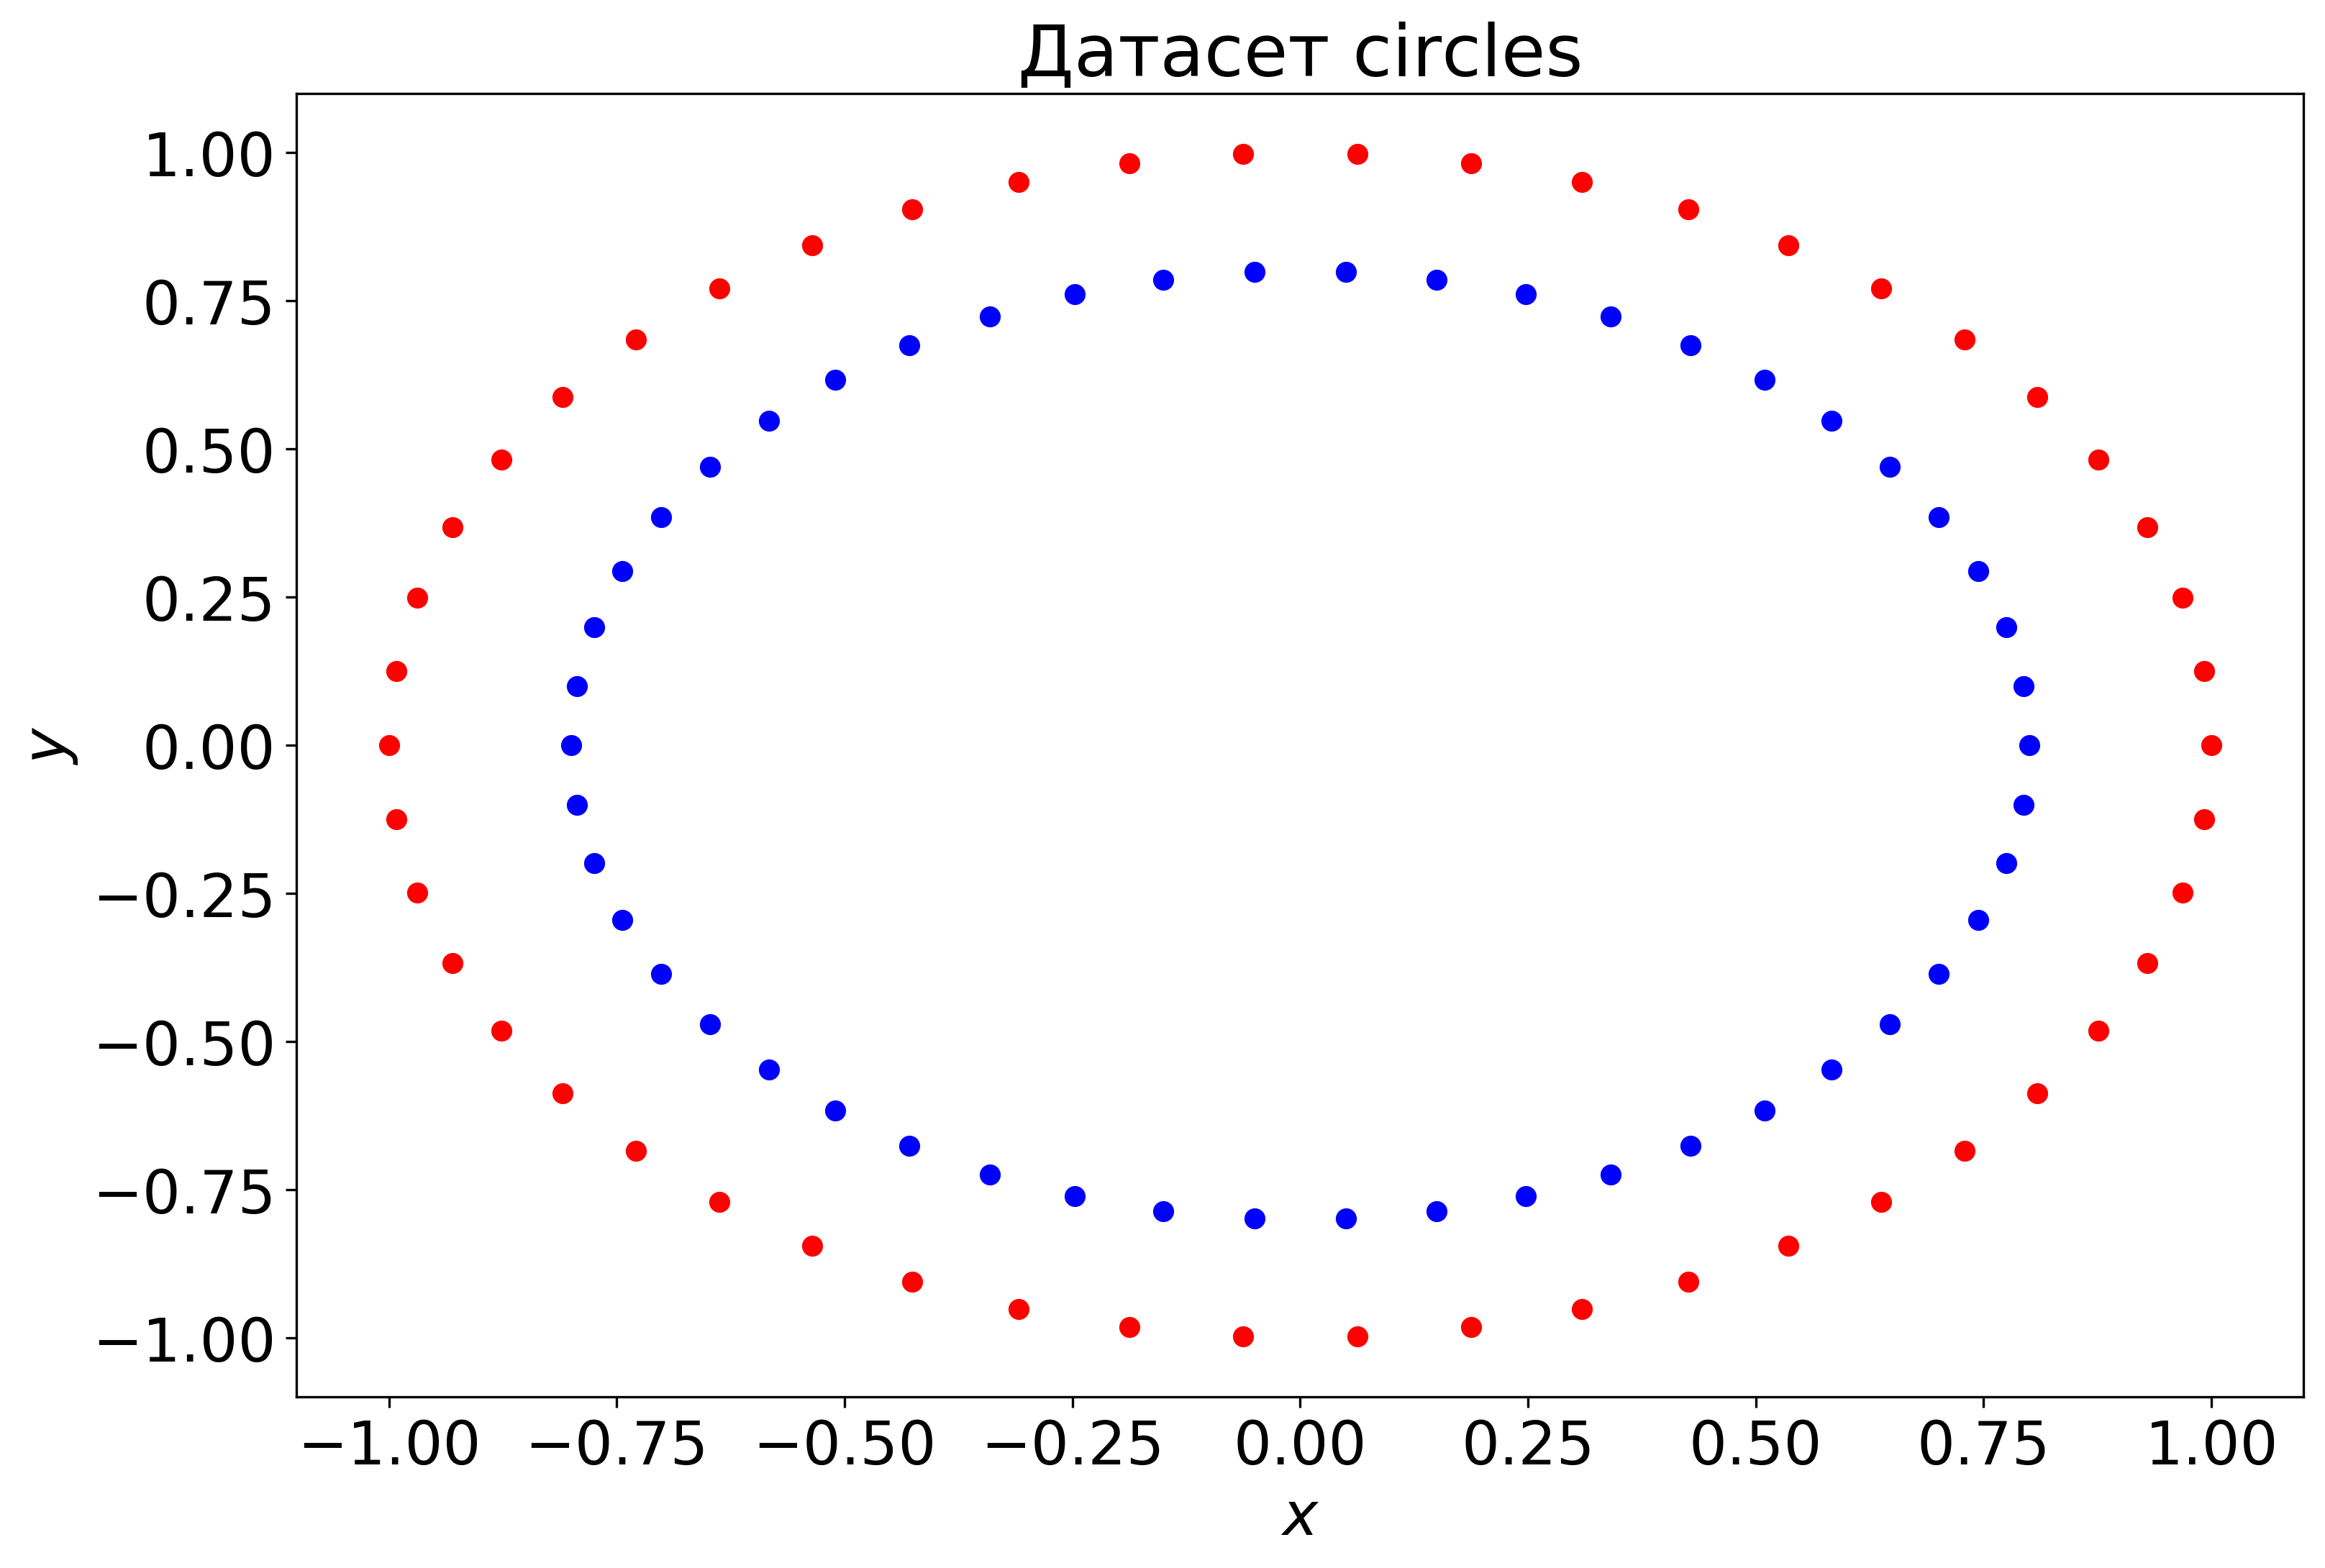

In [2]:
circles = make_circles()
kernel_trick.draw_classification(circles[0], circles[1], title='Датасет circles')

Обучаем логистическую регрессию

/Users/nikita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 0.44


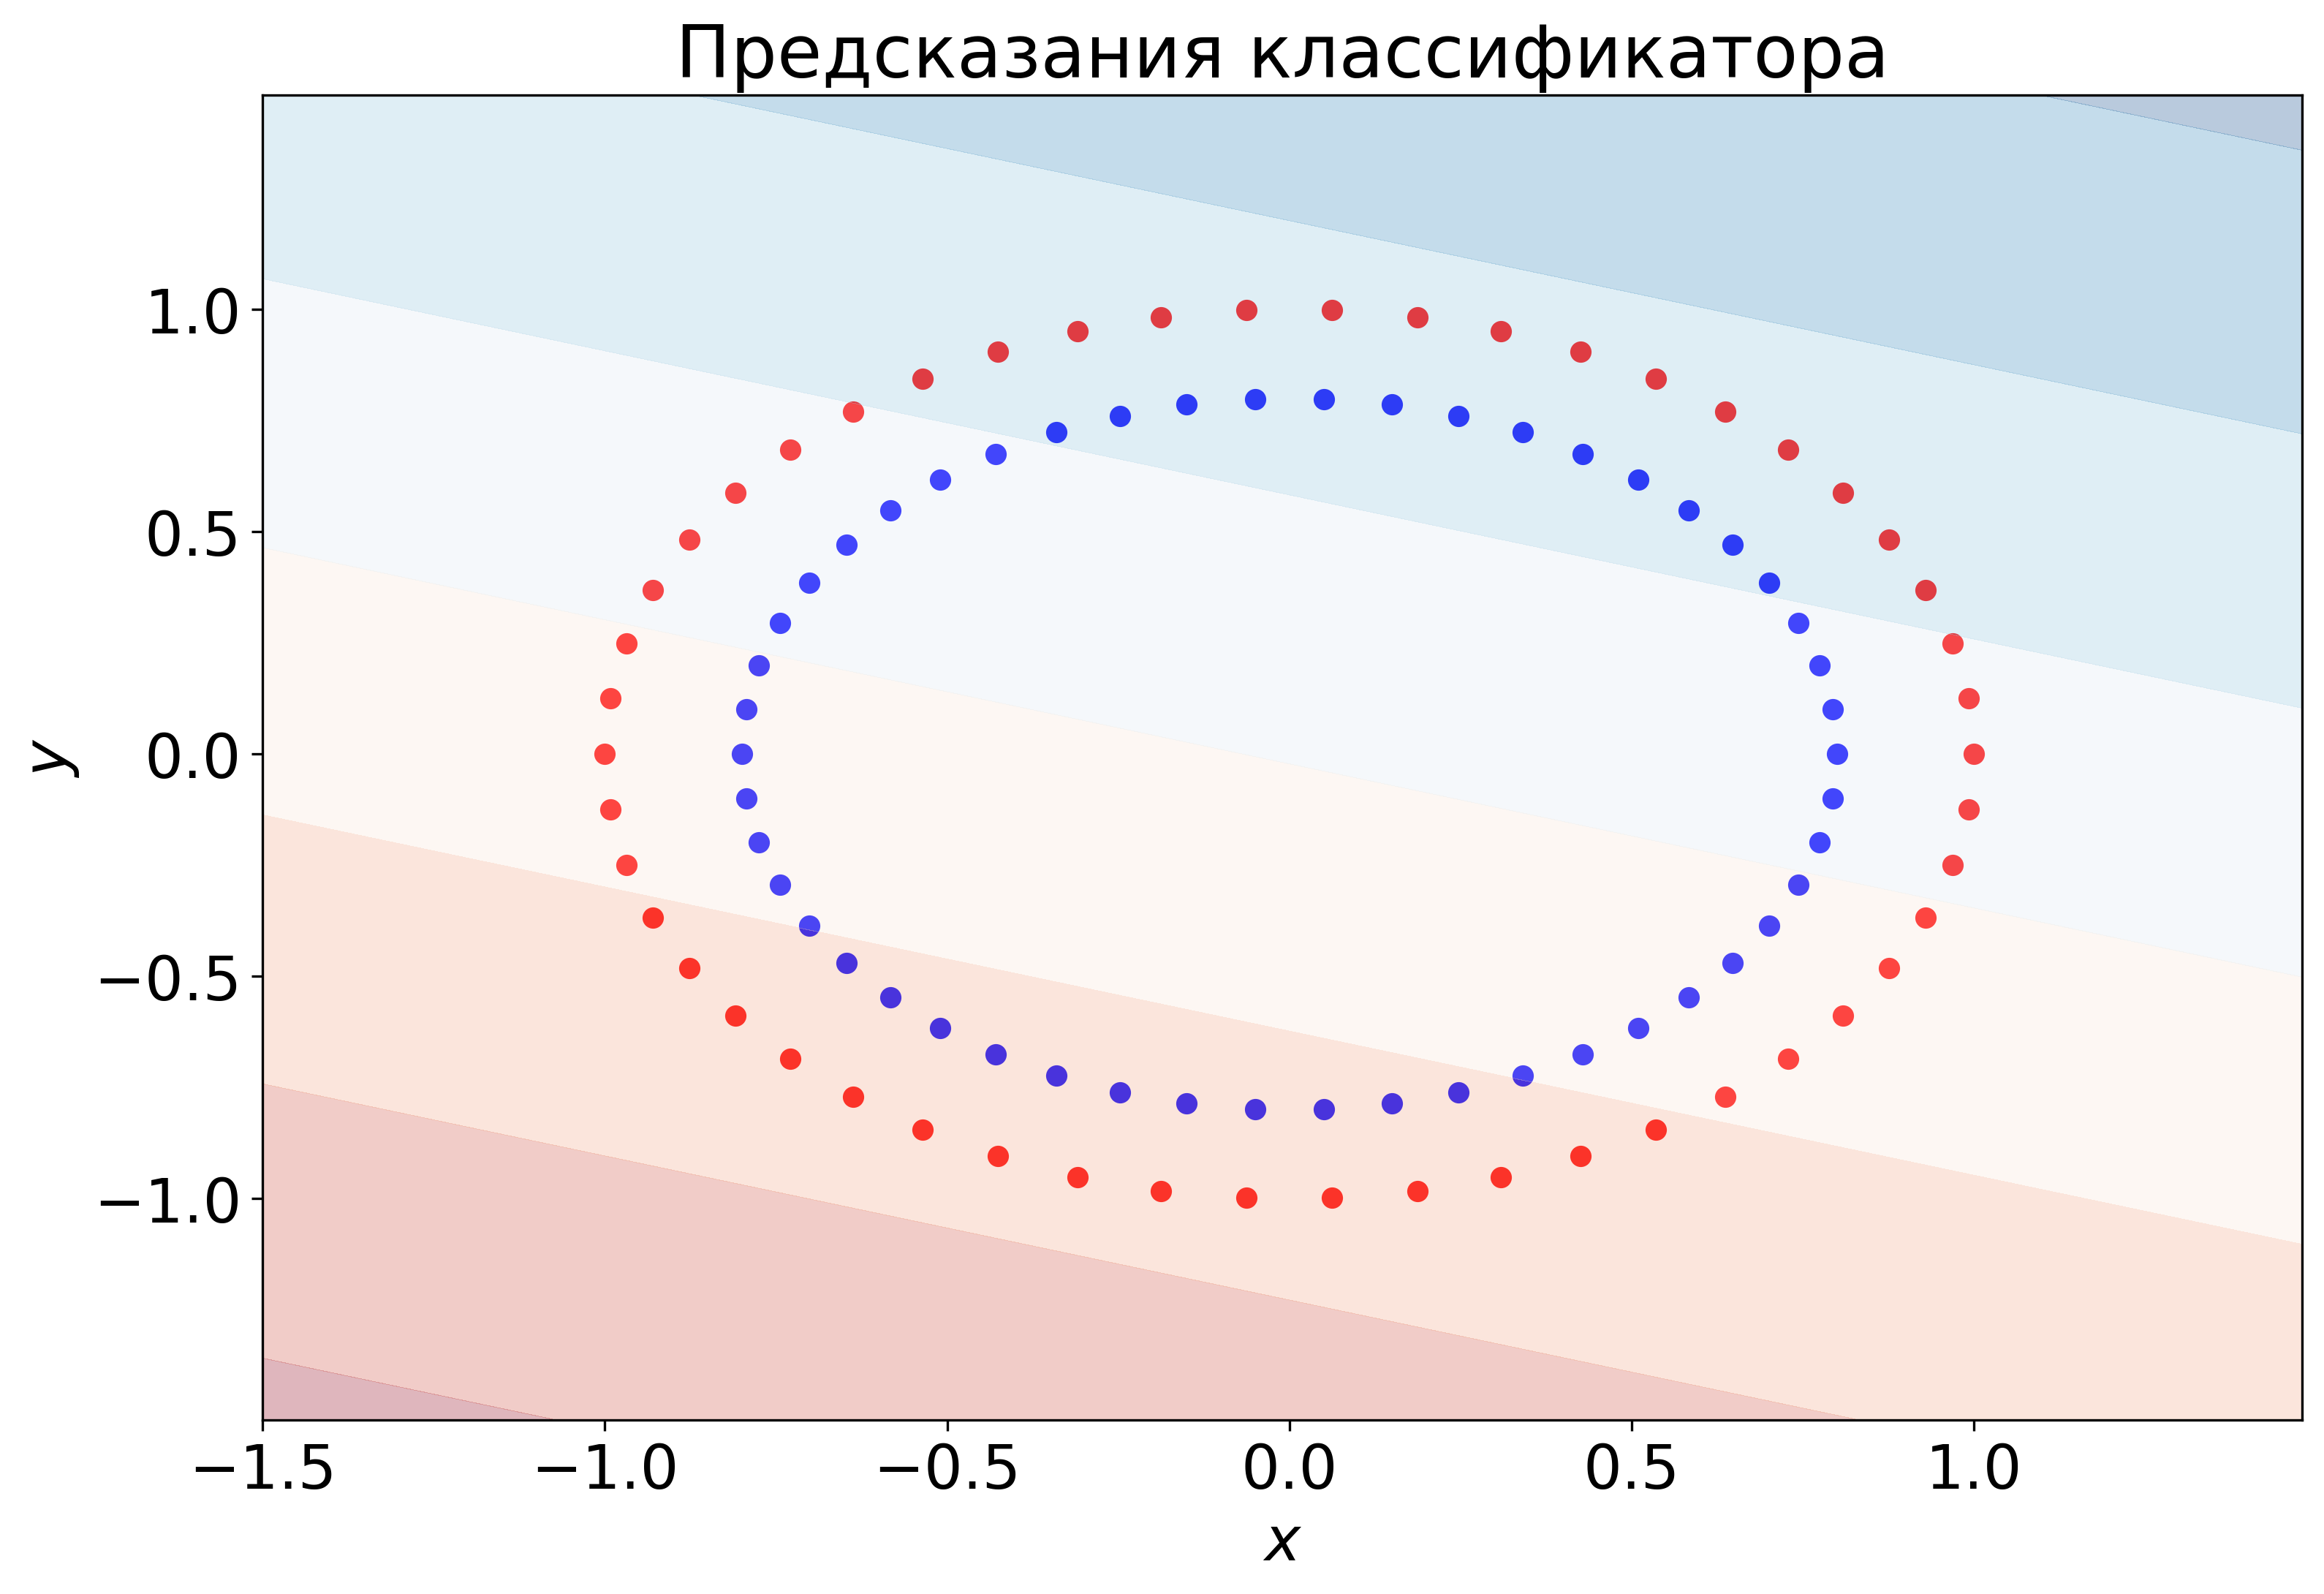

In [266]:
log_reg = LogisticRegression()
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)
print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))
kernel_trick.draw_classification(circles[0], circles[1], model=log_reg)

Логистическая регрессия с полиномиальным ядром

/Users/nikita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 1.0


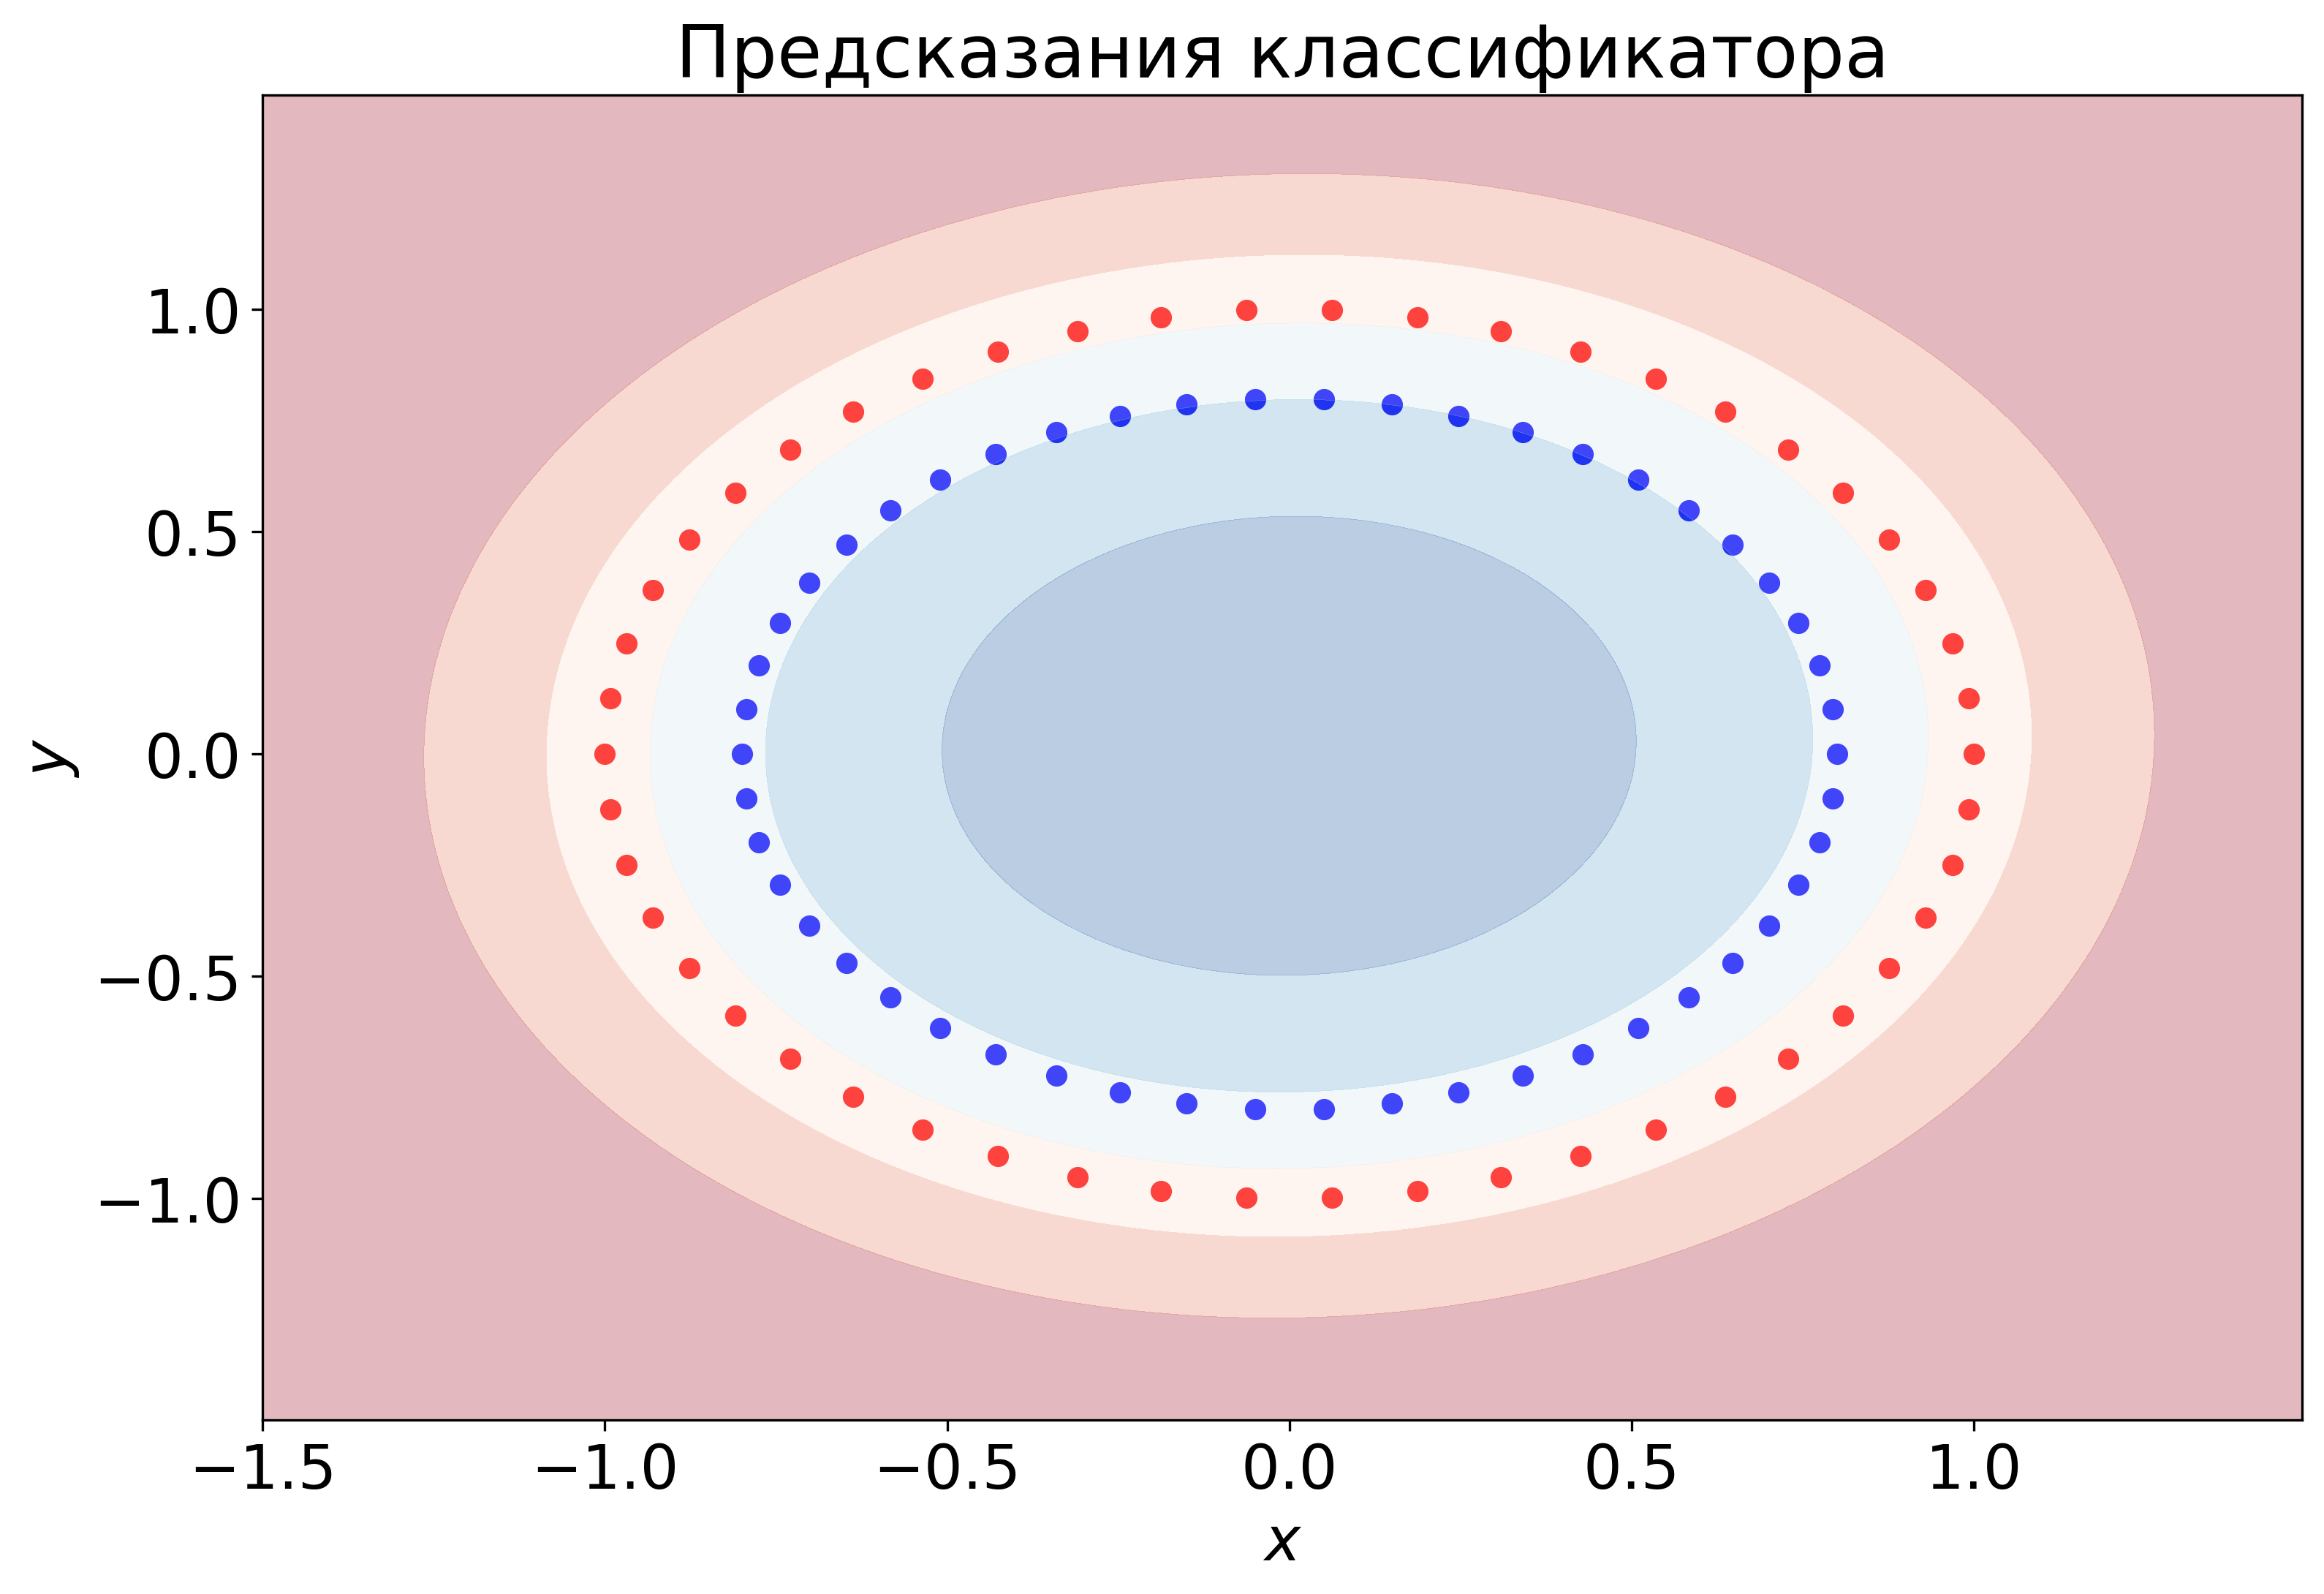

In [270]:
log_reg = LogisticRegression()
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
transformer = kernel_trick.KernelTrick()

train = transformer.transform(train)
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)

print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))

kernel_trick.draw_classification(circles[0], circles[1], model=log_reg, transformer=transformer)

Дерево решений без спрямляющего подпространства

Accuracy score: 0.88


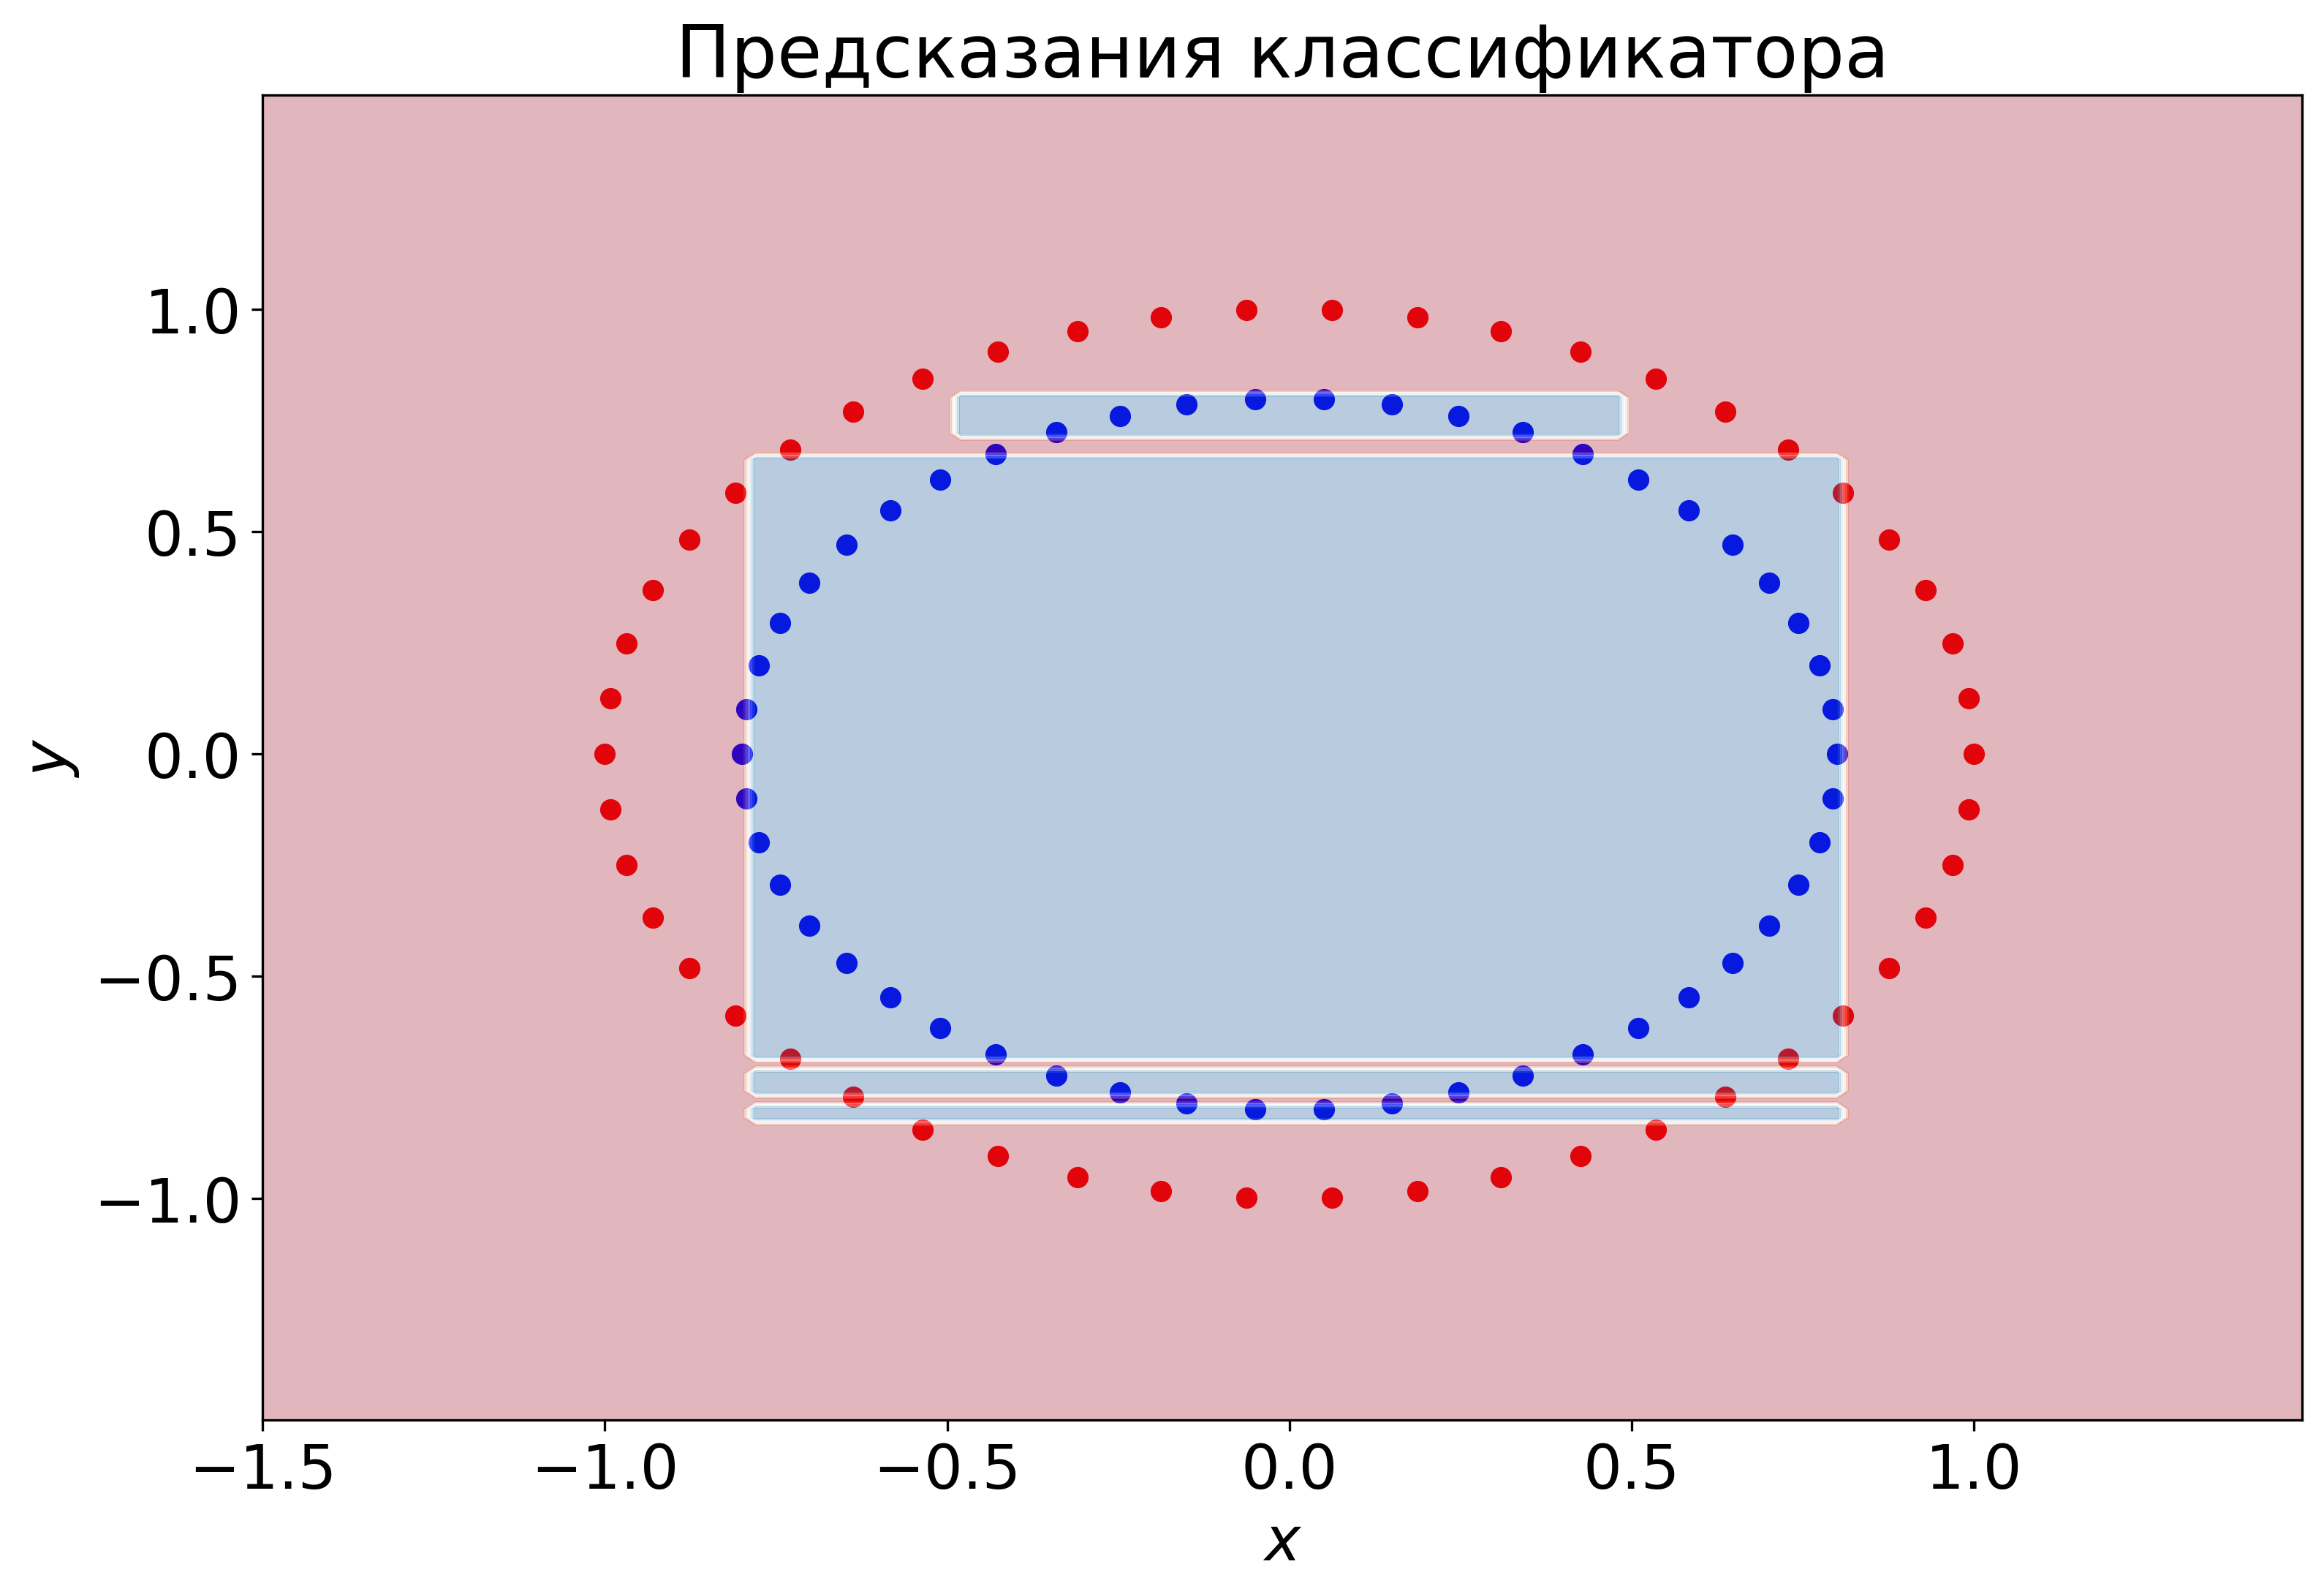

In [268]:
log_reg = DecisionTreeClassifier()
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)
print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))
kernel_trick.draw_classification(circles[0], circles[1], model=log_reg)

Дерево решений с использованием спрямляющего подпространства

Accuracy score: 1.0


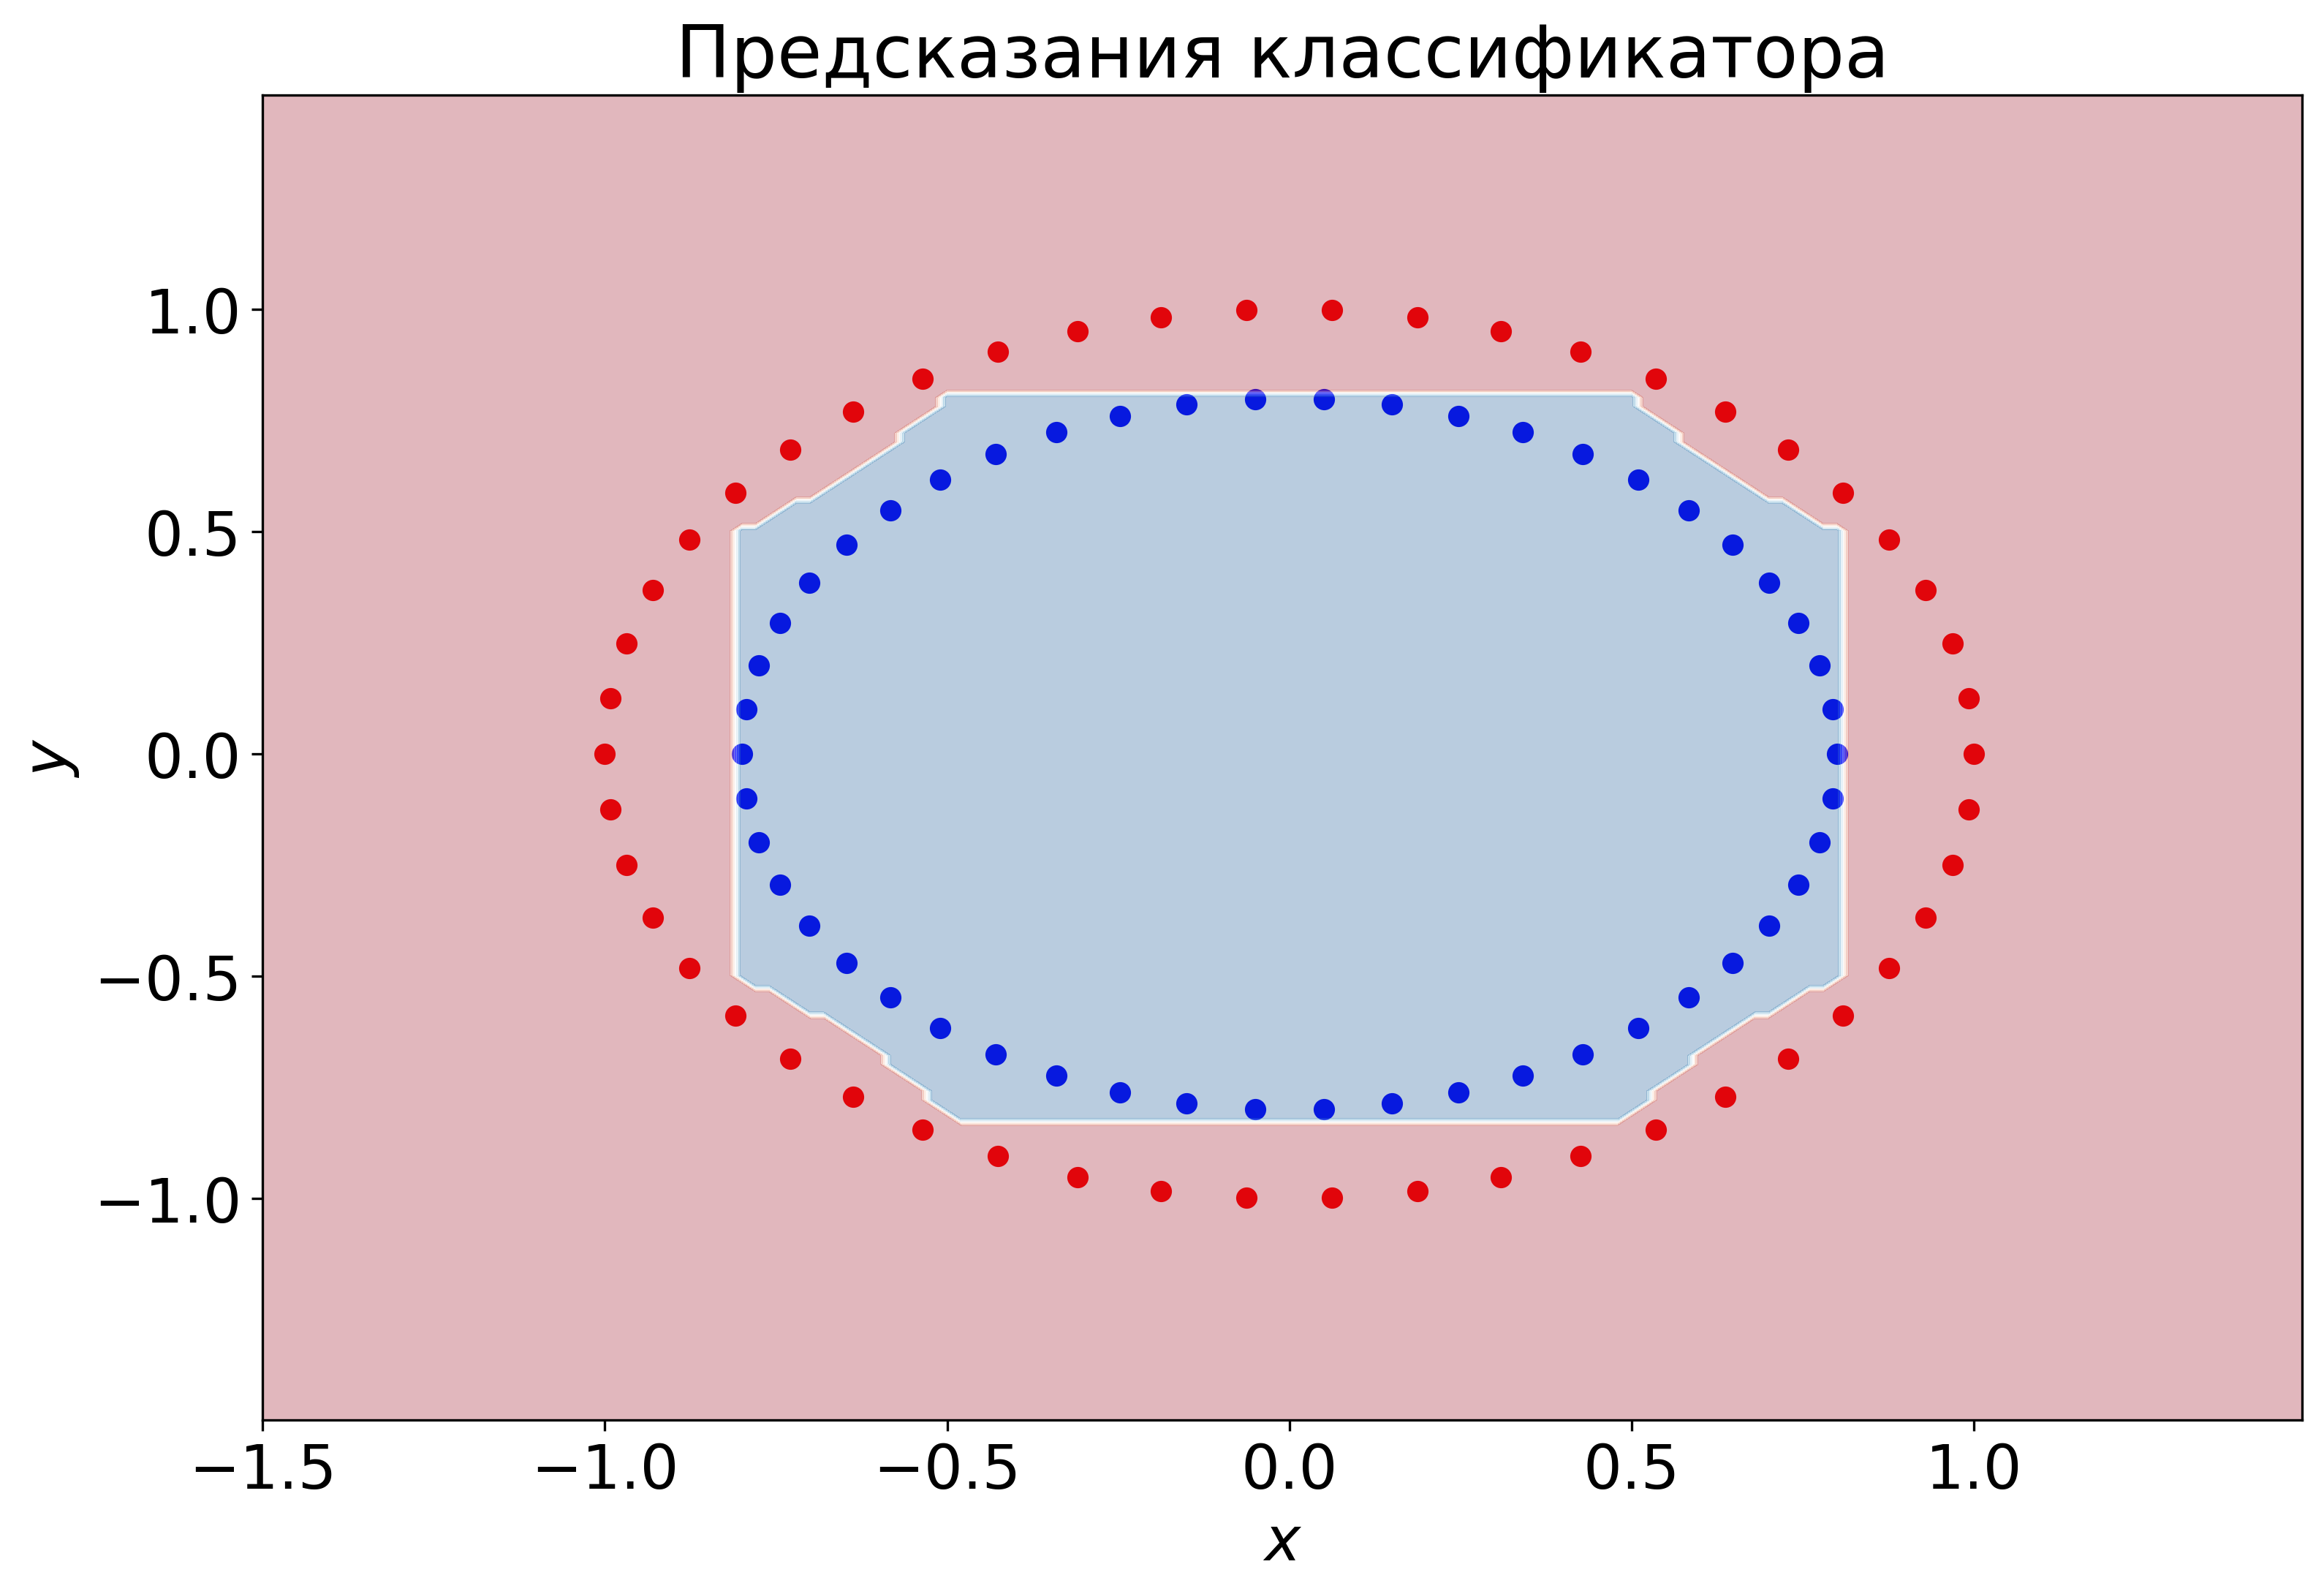

In [273]:
log_reg = DecisionTreeClassifier()
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
transformer = kernel_trick.KernelTrick()

train = transformer.transform(train)
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)

print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))

kernel_trick.draw_classification(circles[0], circles[1], model=log_reg, transformer=transformer)

CatBoost без спрямляющего подпространства

Accuracy score: 0.92


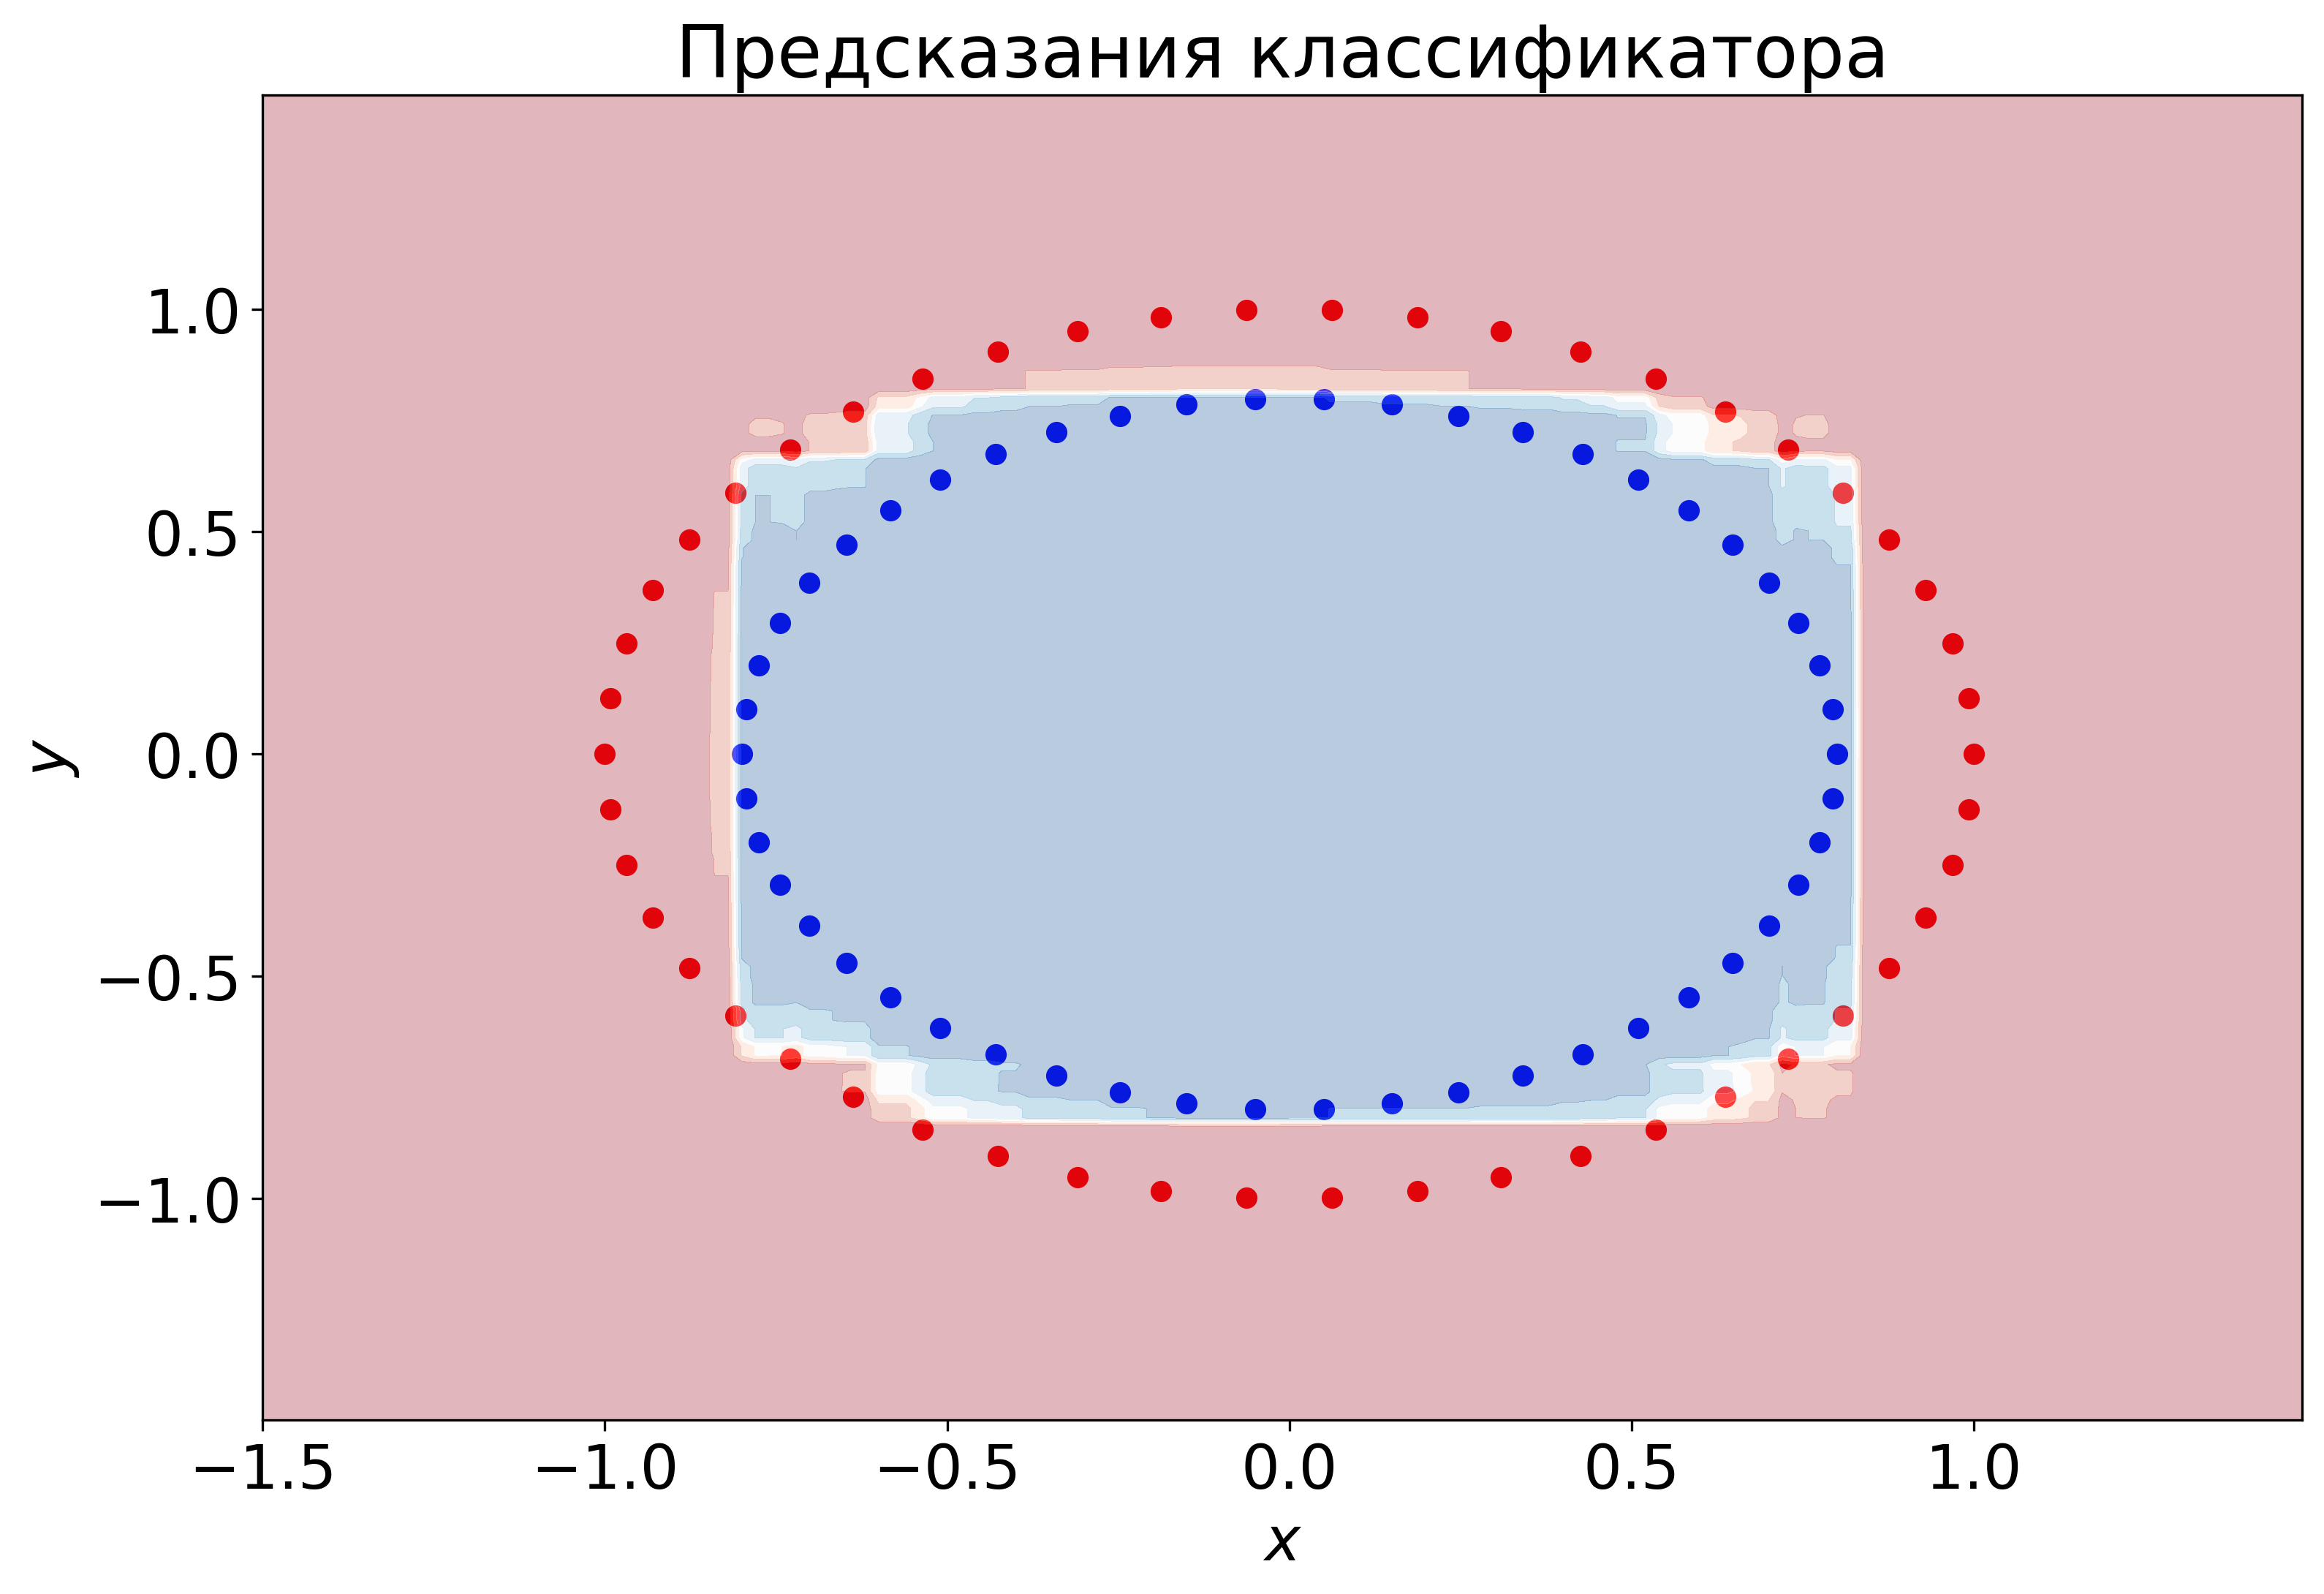

In [272]:
log_reg = CatBoostClassifier(verbose=0)
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)
print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))
kernel_trick.draw_classification(circles[0], circles[1], model=log_reg)

CatBoost с использованием спрямляющего подпространства

Accuracy score: 1.0


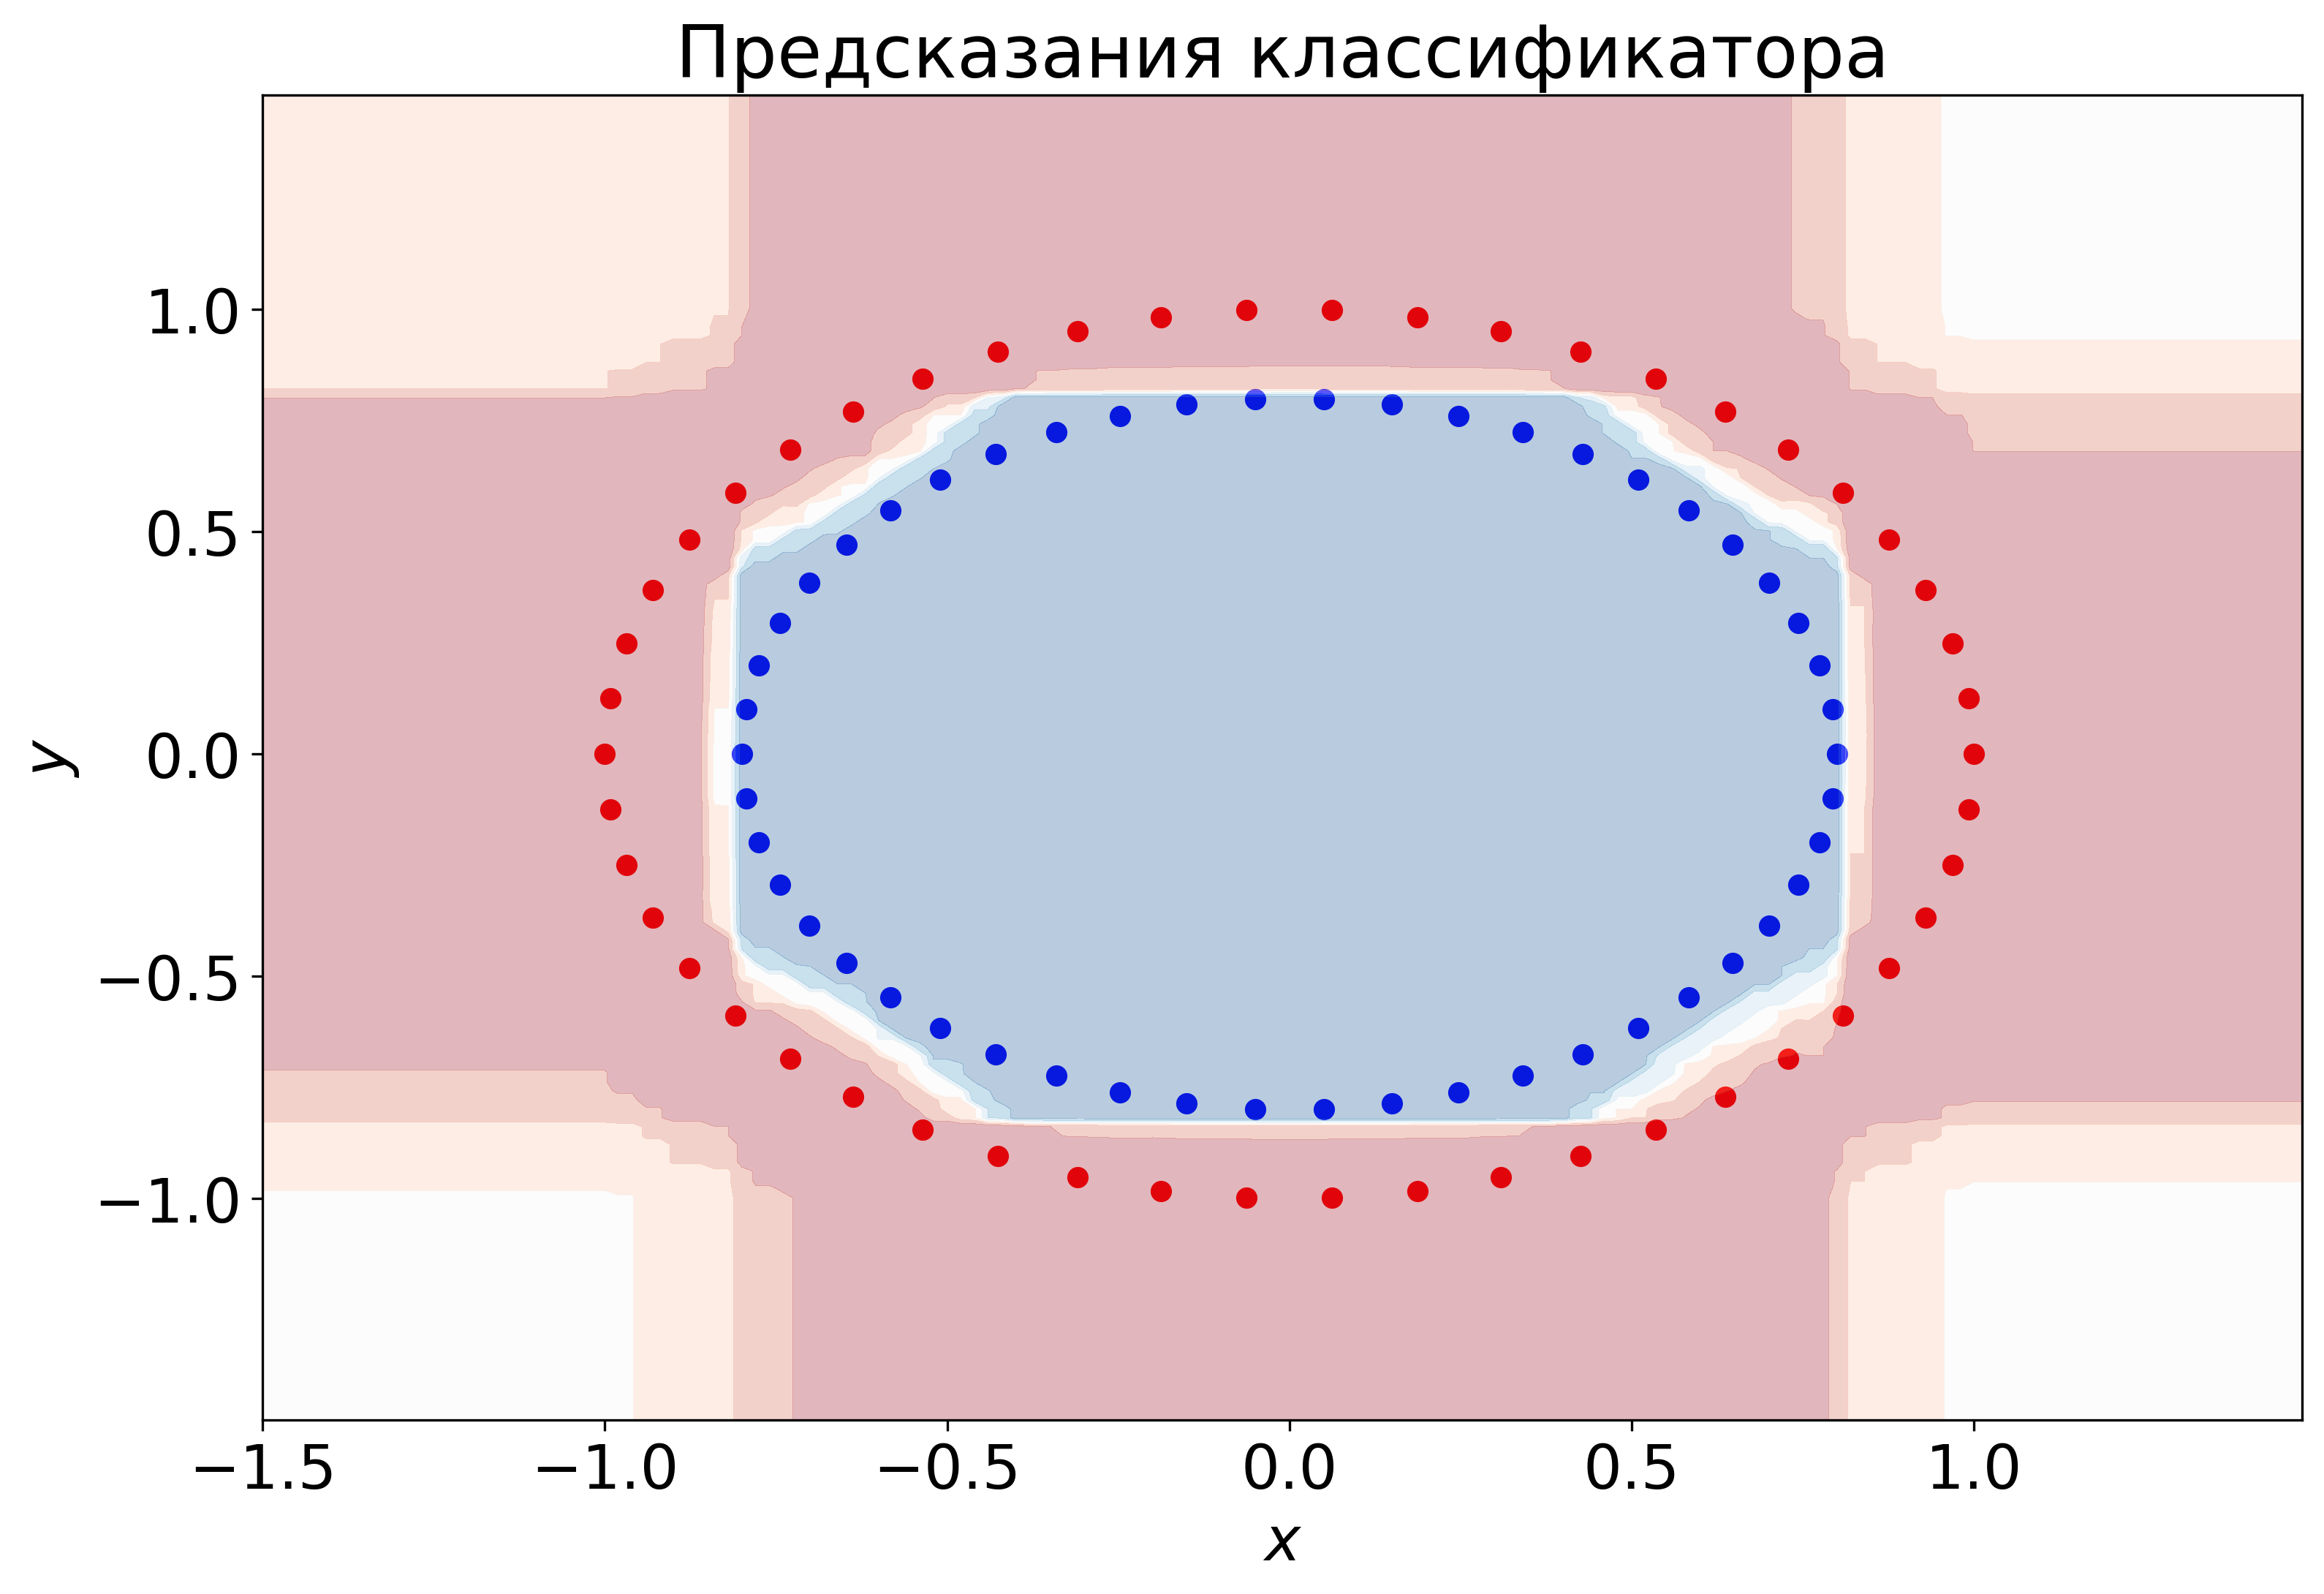

In [274]:
log_reg = CatBoostClassifier(verbose=0)
train = pd.DataFrame({'x': circles[0].T[0], 'y': circles[0].T[1]})
transformer = kernel_trick.KernelTrick()

train = transformer.transform(train)
X_train, X_test, y_train, y_test = train_test_split(train, circles[1])
log_reg.fit(X_train, y_train)

print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))

kernel_trick.draw_classification(circles[0], circles[1], model=log_reg, transformer=transformer)

# Тестирование на датасете boston

In [240]:
data = load_boston()
X = pd.DataFrame(data.data)
X.columns = data.feature_names
y = data.target

In [241]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [243]:
transformer = kernel_trick.KernelTrick()
X_new = transformer.transform(X)
X_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM^2,ZN^2,INDUS^2,CHAS^2,NOX^2,RM^2,AGE^2,DIS^2,RAD^2,TAX^2,PTRATIO^2,B^2,LSTAT^2,CRIM*ZN,CRIM*INDUS,CRIM*CHAS,CRIM*NOX,CRIM*RM,CRIM*AGE,CRIM*DIS,CRIM*RAD,CRIM*TAX,CRIM*PTRATIO,CRIM*B,CRIM*LSTAT,ZN*INDUS,ZN*CHAS,ZN*NOX,ZN*RM,ZN*AGE,ZN*DIS,ZN*RAD,ZN*TAX,ZN*PTRATIO,ZN*B,ZN*LSTAT,INDUS*CHAS,INDUS*NOX,INDUS*RM,INDUS*AGE,INDUS*DIS,INDUS*RAD,INDUS*TAX,INDUS*PTRATIO,INDUS*B,INDUS*LSTAT,CHAS*NOX,CHAS*RM,CHAS*AGE,CHAS*DIS,CHAS*RAD,CHAS*TAX,CHAS*PTRATIO,CHAS*B,CHAS*LSTAT,NOX*RM,NOX*AGE,NOX*DIS,NOX*RAD,NOX*TAX,NOX*PTRATIO,NOX*B,NOX*LSTAT,RM*AGE,RM*DIS,RM*RAD,RM*TAX,RM*PTRATIO,RM*B,RM*LSTAT,AGE*DIS,AGE*RAD,AGE*TAX,AGE*PTRATIO,AGE*B,AGE*LSTAT,DIS*RAD,DIS*TAX,DIS*PTRATIO,DIS*B,DIS*LSTAT,RAD*TAX,RAD*PTRATIO,RAD*B,RAD*LSTAT,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*B,PTRATIO*LSTAT,B*LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.000040,324.0,5.3361,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,234.09,157529.6100,24.8004,0.11376,0.014599,0.0,0.003400,0.041554,0.412064,0.025849,0.00632,1.87072,0.096696,2.508408,0.031474,41.58,0.0,9.684,118.35,1173.6,73.62,18.0,5328.0,275.4,7144.2,89.64,0.0,1.24278,15.18825,150.612,9.447900,2.31,683.76,35.343,916.8390,11.5038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.537350,35.0776,2.200420,0.538,159.248,8.2314,213.53220,2.67924,428.6900,26.891750,6.575,1946.200,100.5975,2609.61750,32.74350,266.66800,65.2,19299.2,997.56,25877.880,324.696,4.0900,1210.6400,62.57700,1623.321000,20.368200,296.0,15.3,396.90,4.98,4528.8,117482.40,1474.08,6072.570,76.194,1976.5620
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.000746,0.0,49.9849,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,316.84,157529.6100,83.5396,0.00000,0.193082,0.0,0.012808,0.175358,2.154759,0.135652,0.05462,6.60902,0.486118,10.839339,0.249613,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,3.31583,45.39647,557.823,35.117397,14.14,1710.94,125.846,2806.0830,64.6198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.011449,37.0041,2.329570,0.938,113.498,8.3482,186.14610,4.28666,506.6169,31.893749,12.842,1553.882,114.2938,2548.49490,58.68794,391.90419,157.8,19093.8,1404.42,31315.410,721.146,9.9342,1202.0382,88.41438,1971.441990,45.399294,484.0,35.6,793.80,18.28,4307.6,96049.80,2211.88,7064.820,162.692,3627.6660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.000745,0.0,49.9849,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,316.84,154315.4089,16.2409,0.00000,0.192940,0.0,0.012799,0.196079,1.667419,0.135552,0.05458,6.60418,0.485762,10.720331,0.109979,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,3.31583,50.79795,431.977,35.117397,14.14,1710.94,125.846,2777.3081,28.4921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.369765,28.6559,2.329570,0.938,113.498,8.3482,184.23727,1.89007,439.0035,35.688614,14.370,1738.770,127.8930,2822.48355,28.95555,303.48981,122.2,14786.2,1087.58,24001.913,246.233,9.9342,1202.0382,88.41438,1951.225893,20.017413,484.0,35.6,785.66,8.06,4307.6,95064.86,975.26,6992.374,71.734,1583.1049
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.001048,0.0,4.7524,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,349.69,155732.8369,8.6436,0.00000,0.070567,0.0,0.014825,0.226525,1.482546,0.196233,0.09711,7.18614,0.605319,12.774173,0.095168,0.00,0.0,0.000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.99844,15.25564,99.844,13.215596,6.54,483.96,40.766,860.2934,6.4092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.205084,20.9764,2.776488,1.374,101.676,8.5646,180.74054,1.34652,320.5084,42.423276,20.994,1553.556,130.8626,2761.62074,20.57412,277.64876,137.4,10167.6,856.46,18074.054,134.652,18.1866,1345.8084,113.36314,2392.325986,17.822868,666.0,56.1,1183.89,8.82,4151.4,87607.86,652.68,7379.581,54.978,1160.2122
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.004768,0.0,4.7524,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,349.69,157529.6100,28.4089,0.00000,0.150529,0

In [244]:
feature_selector = SelectFromModel(LinearRegression().fit(X, y), prefit=True)
X_best = feature_selector.transform(X)

#X_best = X[feature_selector._best_columns]
regressor1 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)
regressor1.fit(X_train, y_train)
metrics.mean_squared_error(regressor1.predict(X_test), y_test)

34.273540560433446

In [245]:
regressor2 = LinearRegression()
X_new = transformer.transform(X)
feature_selector = SelectFromModel(LinearRegression().fit(X_new, y), prefit=True)
X_new = feature_selector.transform(X_new)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

regressor2.fit(X_train_new, y_train)
metrics.mean_squared_error(regressor2.predict(X_test_new), y_test)

27.307173429531364

In [246]:
feature_selector = SelectFromModel(CatBoostRegressor().fit(X, y, verbose=0), prefit=True)
X_best = feature_selector.transform(X)

#X_best = X[feature_selector._best_columns]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

regressor1 = CatBoostRegressor()
regressor1.fit(X_train, y_train, verbose=0)
metrics.mean_squared_error(regressor1.predict(X_test), y_test)

9.25693727413055

In [247]:
X_new = transformer.transform(X)
columns2 = np.array(X_new.columns)
#print(X_new.head())
feature_selector = SelectFromModel(CatBoostRegressor().fit(X_new, y, verbose=0), prefit=True)
X_new = feature_selector.transform(X_new)

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

regressor2 = CatBoostRegressor()
regressor2.fit(X_train_new, y_train, verbose=0)
metrics.mean_squared_error(regressor2.predict(X_test_new), y_test)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  ...  RAD*PTRATIO    RAD*B  RAD*LSTAT  TAX*PTRATIO      TAX*B  TAX*LSTAT  PTRATIO*B  PTRATIO*LSTAT    B*LSTAT
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  ...         15.3   396.90       4.98       4528.8  117482.40    1474.08   6072.570         76.194  1976.5620
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  ...         35.6   793.80      18.28       4307.6   96049.80    2211.88   7064.820        162.692  3627.6660
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  ...         35.6   785.66       8.06       4307.6   95064.86     975.26   6992.374         71.734  1583.1049
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  ...         56.1  1183.89       8.82       4151.4   87607.86     652.68   7379.581         54.978  1160.2122
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  ...         56.1  1190.70      15.99       4151.4   88111.80    1183.26

8.331268746987675

In [248]:
list(zip(list(columns2[feature_selector.get_support()]), list(regressor2.feature_importances_)))

[('RM', 13.58604751320951),
 ('LSTAT', 3.6316271319351086),
 ('NOX^2', 4.334592105221327),
 ('RM^2', 7.037848648259302),
 ('LSTAT^2', 3.4868444331979407),
 ('INDUS*NOX', 3.2510620310407226),
 ('INDUS*DIS', 4.620979227574411),
 ('NOX*DIS', 5.334696343789067),
 ('NOX*LSTAT', 6.249126308513017),
 ('RM*B', 6.607692941972313),
 ('RM*LSTAT', 2.808007777191249),
 ('AGE*DIS', 3.8030930457942045),
 ('AGE*LSTAT', 3.0457606426177337),
 ('DIS*LSTAT', 9.104476537008454),
 ('TAX*PTRATIO', 5.706300454283133),
 ('TAX*LSTAT', 3.624106099902072),
 ('PTRATIO*LSTAT', 9.989076245697573),
 ('B*LSTAT', 3.778662512792839)]

# Гауссовское ядро в задаче классификации

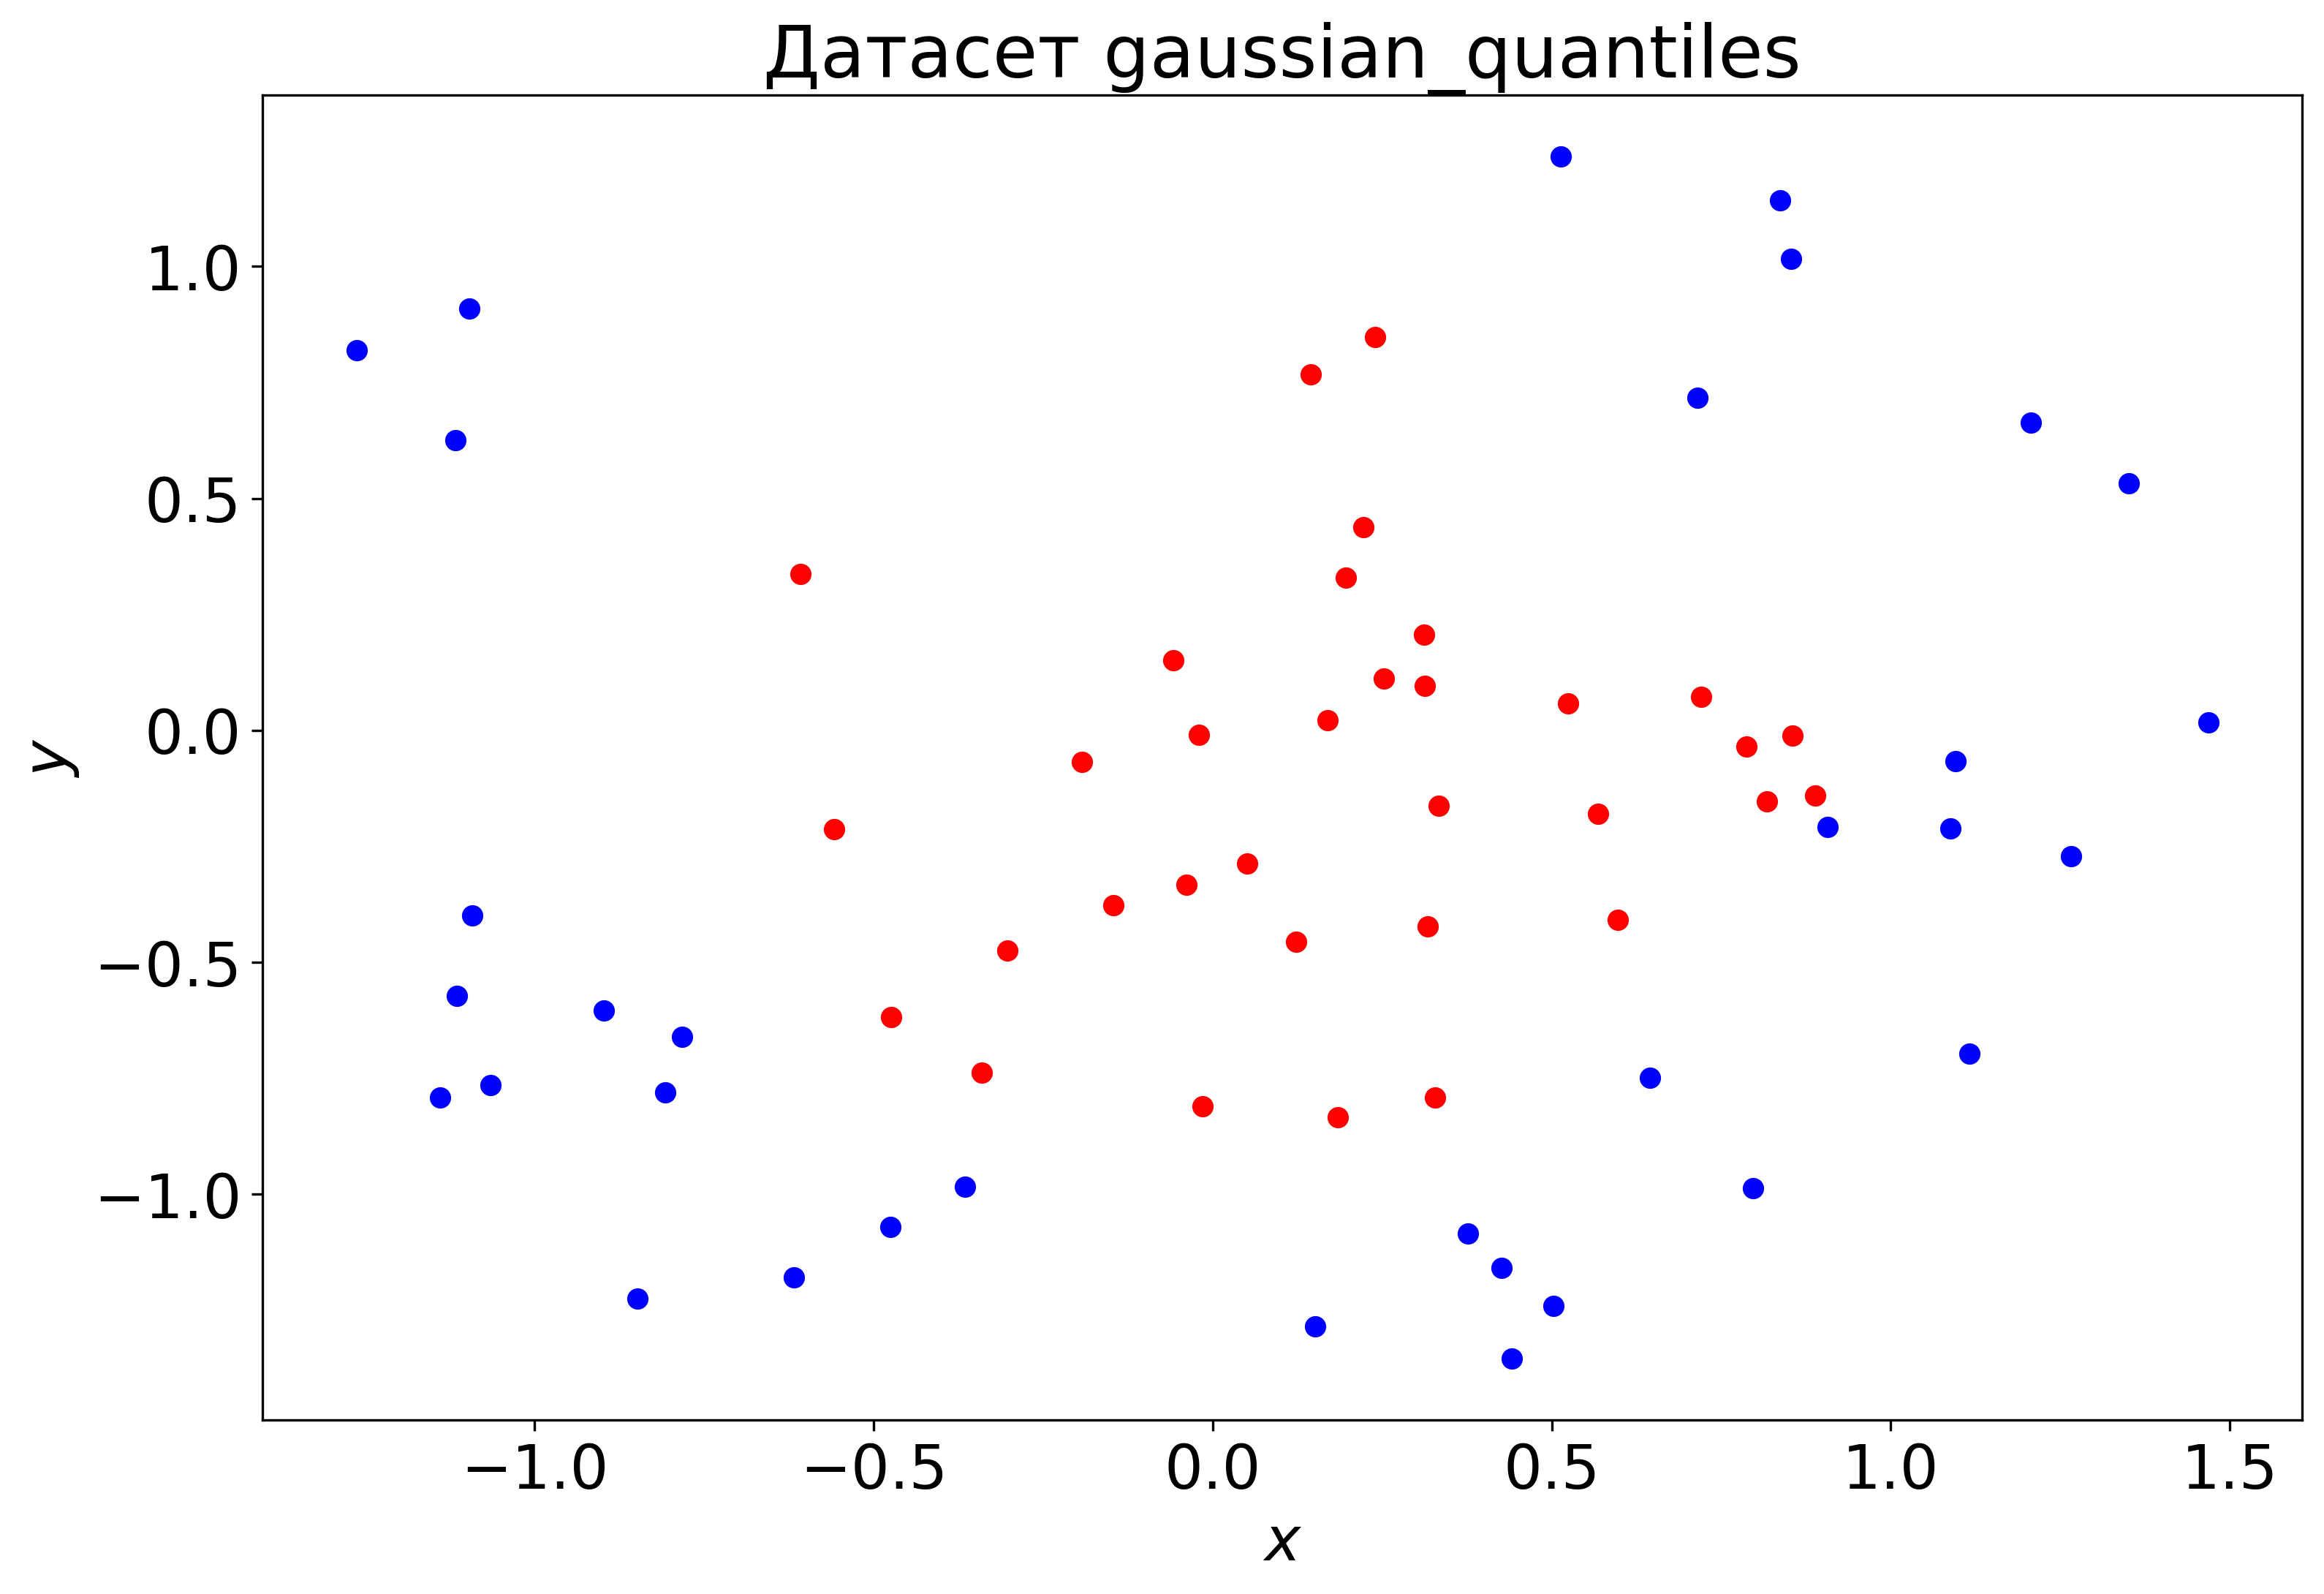

In [53]:
g_q = make_gaussian_quantiles()
kernel_trick.draw_classification(g_q[0], g_q[1], title='Датасет gaussian_quantiles')

/Users/nikita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nikita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score: 0.12


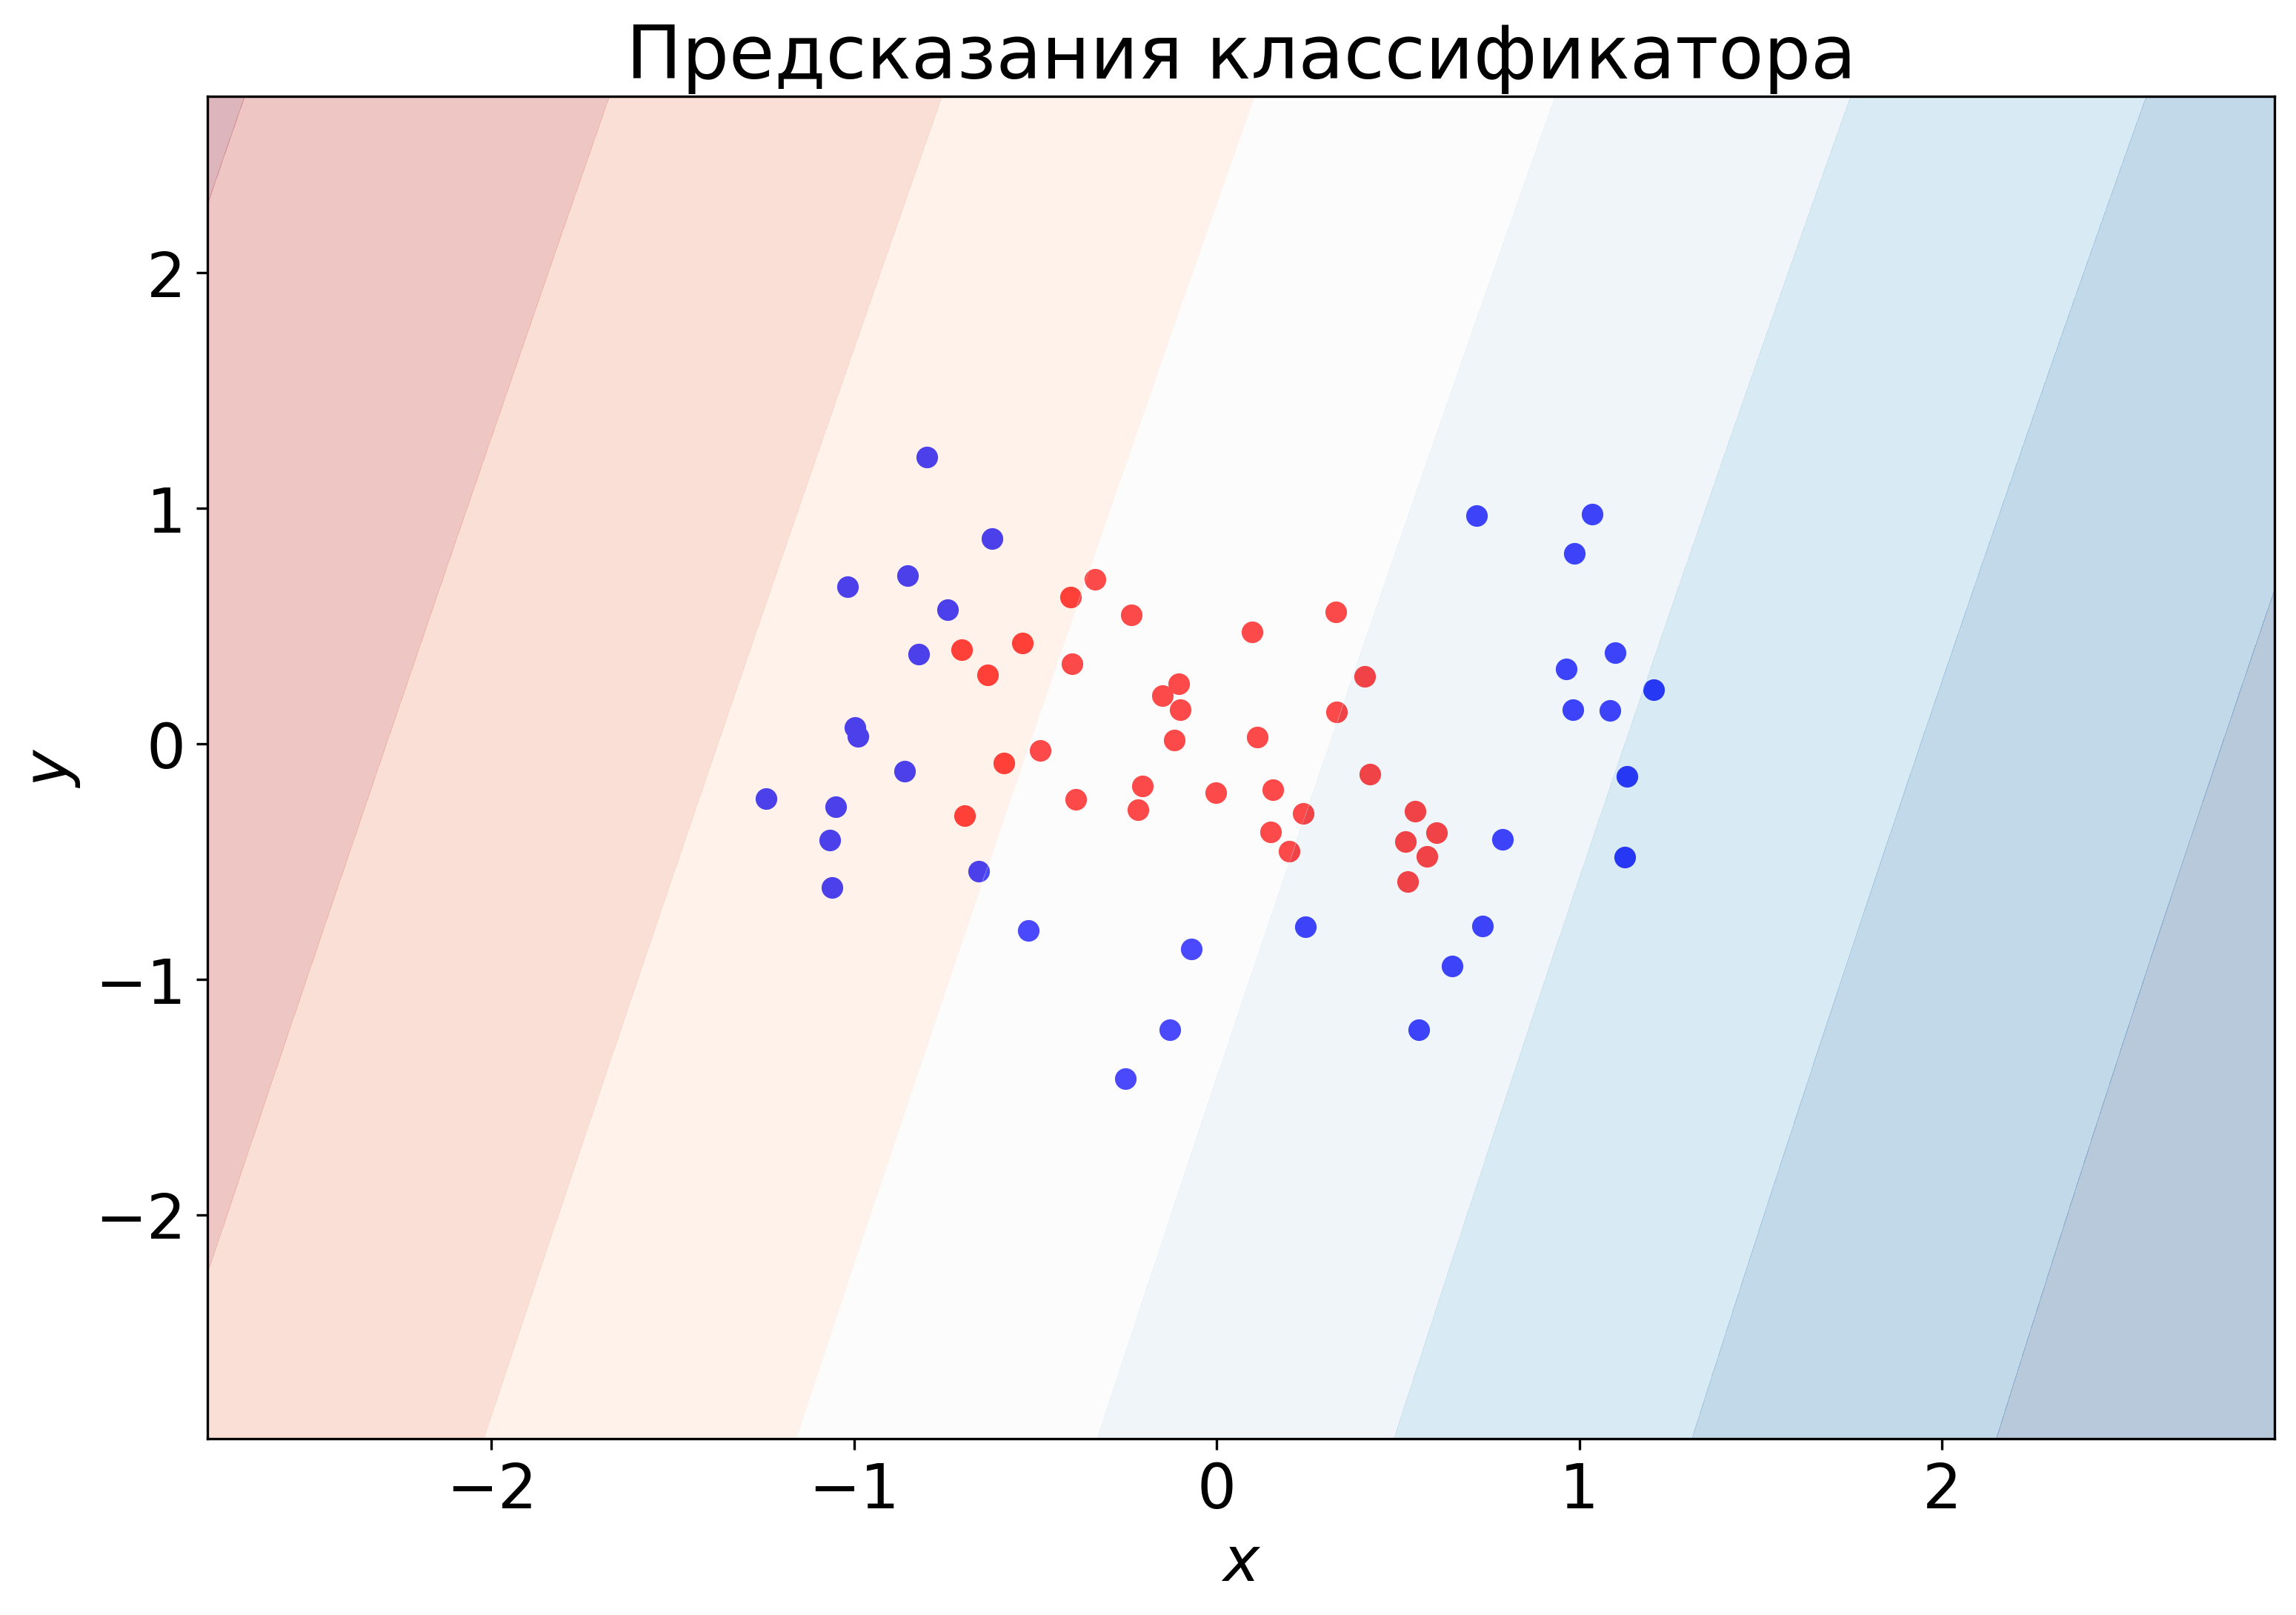

In [50]:
log_reg = LogisticRegression()
train = pd.DataFrame({'x': g_q[0].T[0], 'y': g_q[0].T[1]})
X_train, X_test, y_train, y_test = train_test_split(train, g_q[1])
log_reg.fit(X_train, y_train)
print('Accuracy score: {}'.format(str(metrics.accuracy_score(log_reg.predict(X_test), y_test))))
kernel_trick.draw_classification(g_q[0], g_q[1], model=log_reg)

/Users/nikita/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score: 0.92


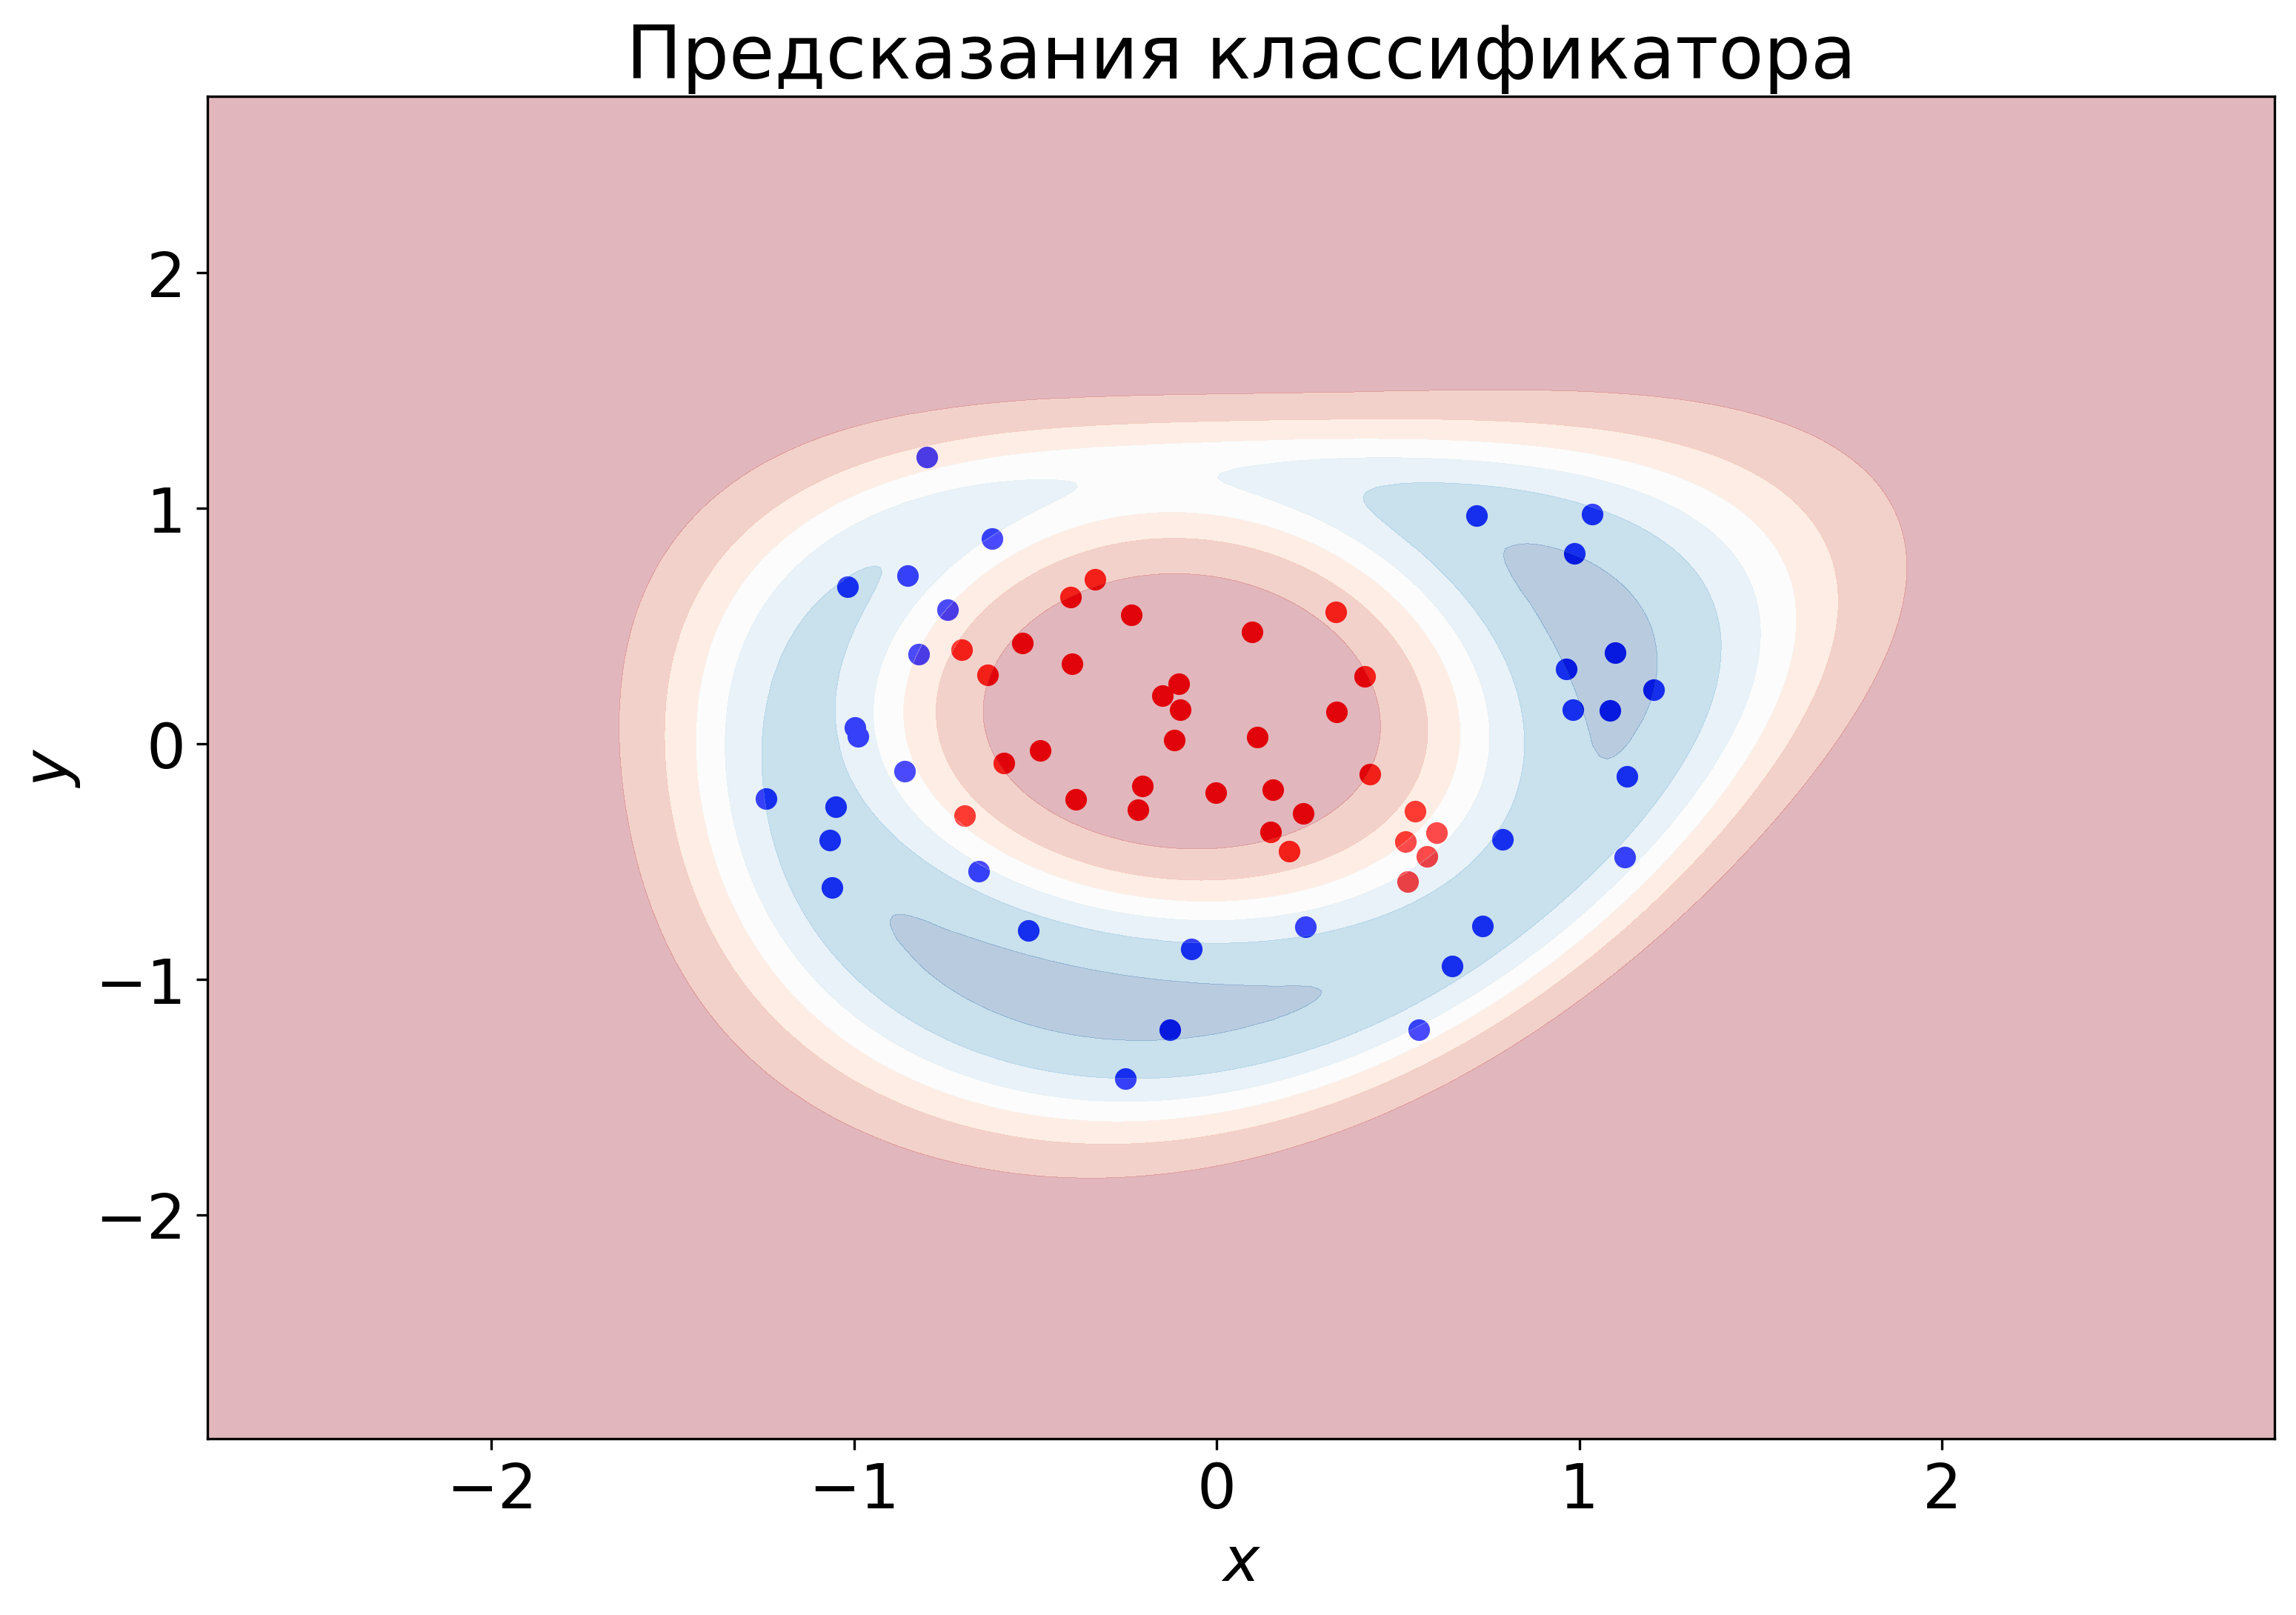

In [52]:
svclassifier = SVC(kernel='rbf', probability=True)
train = pd.DataFrame({'x': g_q[0].T[0], 'y': g_q[0].T[1]})
X_train, X_test, y_train, y_test = train_test_split(train, g_q[1])
svclassifier.fit(X_train, y_train)
print('Accuracy score: {}'.format(str(metrics.accuracy_score(svclassifier.predict(X_test), y_test))))
kernel_trick.draw_classification(g_q[0], g_q[1], model=svclassifier)